# Analysis of f$_{NL}$ with DESI LRGs

This notebook will include snippets regardin the log-normal mocks for the DESI fNL project.

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import modules as md

running on /users/PHS0336/medirz90


In [4]:
%matplotlib inline

In [5]:
# make plots look nicer
md.setup_color()

## Plots

running on /users/PHS0336/medirz90
804.7733133867316


'NimbusSansNarrow-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'NimbusSansNarrow-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


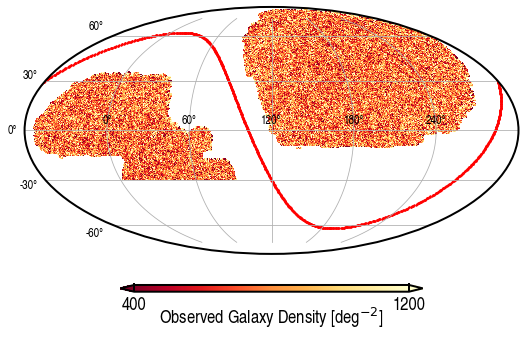

In [6]:
md.plot_ngmoll()

running on /users/PHS0336/medirz90


No handles with labels found to put in legend.
No handles with labels found to put in legend.
'NimbusSansNarrow-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'NimbusSansNarrow-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


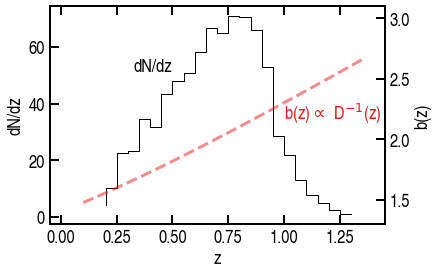

In [7]:
md.plot_nz()

running on /users/PHS0336/medirz90
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


                           MAP [scipy]  MAP [chain]  Mean [chain]  \
Full Sky                     -0.007873    -0.033845     -1.852995   
F. Sky [BMzLS scaled]        -0.072402    -0.040983    -15.015178   
BASS/MzLS                     0.757876     0.754605    -15.691951   
DECaLS North                  0.172164     0.171422    -16.736365   
DECaLS South                  0.421240     0.113803    -14.964974   
NGC                           0.397463     0.399212    -10.613442   
Joint (BMzLS+DECaLS N)        0.437847     0.440217    -10.431834   
Joint (DECaLS N+DECaLS S)     0.298779     0.578769    -10.906034   
DESI                          0.415860     0.450408     -7.096723   
Joint (BMzLS+DECaLS)          0.514907     0.955778     -7.222336   

                           Median [chain]       16th       84th  
Full Sky                        -1.225212  -9.856724   6.260910  
F. Sky [BMzLS scaled]          -10.448609 -43.919130  10.793301  
BASS/MzLS                      -11.477340 

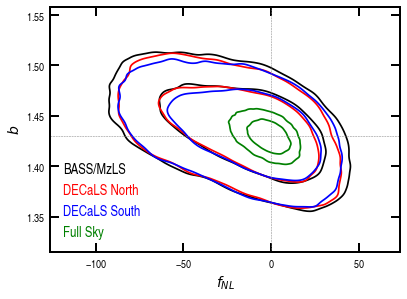

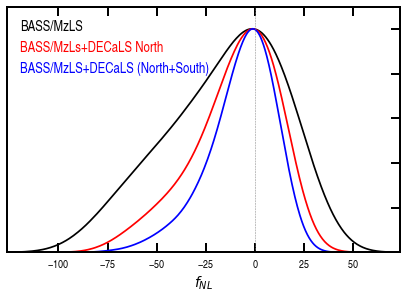

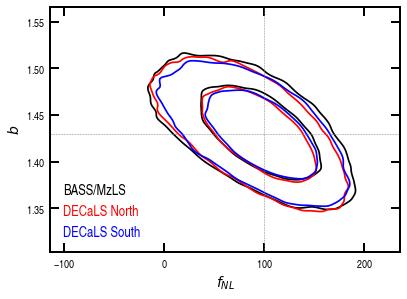

In [8]:
md.plot_mcmc_mocks()

In [ ]:
titles = {'bmzls':'BASS/MzLS', 
         'ndecals':'DECaLS North',
         'sdecals':'DECaLS South'}

stg = {'mult_bias_correction_order':0,'smooth_scale_2D':0.15, 'smooth_scale_1D':0.3, 'contours': [0.68, 0.95]}
mc_kw = dict(names=['fnl', 'b', 'n0'], 
             labels=['f_{NL}', 'b', '10^{7}n_{0}'], settings=stg) 

read_kw = dict(ndim=3, iscale=[2])
mc_kw2 = dict(names=['fnl', 'b', 'n0', 'b2', 'n02'], 
              labels=['f_{NL}', 'b1', '10^{7}n_{0}', 'b2', '10^{7}n_{0}2'], settings=stg)
read_kw2 = dict(ndim=5, iscale=[2, 4])
mc_kw3 = dict(names=['fnl', 'b', 'n0', 'b2', 'n02', 'b3', 'n03'], 
              labels=['f_{NL}', 'b1', '10^{7}n_{0}', 'b2', '10^{7}n_{0}2', 'b3', '10^{7}n_{0}3'], settings=stg)
read_kw3 = dict(ndim=7, iscale=[2, 4, 6])

xlim = None

with PdfPages('figs/fnl2d_dr9_regions.pdf') as pdf:

    for r in ['bmzls', 'ndecals', 'sdecals']:

        noweight = MCMC(f'/fs/ess/PHS0336/data/rongpu/imaging_sys/mcmc/0.57.0/mcmc_lrg_zero_{r}_noweight_steps10k_walkers50.npz', mc_kw=mc_kw, read_kw=read_kw)
        nnknown = MCMC(f'/fs/ess/PHS0336/data/rongpu/imaging_sys/mcmc/0.57.0/mcmc_lrg_zero_{r}_nn_known_steps10k_walkers50.npz', mc_kw=mc_kw, read_kw=read_kw)
        nnall = MCMC(f'/fs/ess/PHS0336/data/rongpu/imaging_sys/mcmc/0.57.0/mcmc_lrg_zero_{r}_nn_all_steps10k_walkers50.npz', mc_kw=mc_kw, read_kw=read_kw)


        # Triangle plot
        g = plots.get_single_plotter(width_inch=4*1.5)
        g.settings.legend_fontsize = 14

        g.plot_2d([noweight, nnknown, nnall], 'fnl', 'b', filled=True)
        g.add_legend(['No Correction', 'Conservative', 'Extreme'], colored_text=True, title=titles[r])


        ## --- for blinding
        hwidth=0.0
        width=0.001
        kw = dict(shape='full', width=width, 
                  head_width=hwidth, alpha=0.8)  
        kw2 = dict()#bbox={'facecolor': 'w', 'alpha': 0.5, 'pad': 10})
        mparams = noweight.samples.mean(axis=0)
        dparams = mparams - nnknown.samples.mean(axis=0)
        g.subplots[0, 0].arrow(mparams[0], 0.97*mparams[1], -dparams[0], 0, color='r', **kw)
        g.subplots[0, 0].text(mparams[0]-0.5*dparams[0], 0.975*mparams[1], '%.1f'%abs(dparams[0]), color='r', **kw2)

        dparams = mparams - nnall.samples.mean(axis=0)
        g.subplots[0, 0].arrow(mparams[0], 1.03*mparams[1], -dparams[0], 0, color='b', **kw)
        g.subplots[0, 0].text(mparams[0]-0.5*dparams[0], 1.035*mparams[1], '%.1f'%abs(dparams[0]), color='b', **kw2)



        g.subplots[0, 0].set_ylim((1.23, 1.6))
        #if xlim is None:
        #    xlim = g.subplots[0, 0].get_xlim()
        #g.subplots[0, 0].set_xlim(xlim[0]-mparams[0], xlim[1]-mparams[0])
        g.subplots[0, 0].set_xticklabels([]) # VERY IMPORTANT!!!


        g.fig.align_labels()
        #g.fig.show()
        pdf.savefig(bbox_inches='tight')
        # g.fig.savefig('figs/fnl2dmocks.pdf', bbox_inches='tight')

In [ ]:
path_ = '/fs/ess/PHS0336/data/rongpu/imaging_sys/mcmc/0.57.0/'
titles = {'nn_known':'Conservative', 
         'nn_all':'Extreme'}

stg = {'mult_bias_correction_order':0,'smooth_scale_2D':0.15, 'smooth_scale_1D':0.3, 'contours': [0.68, 0.95]}
mc_kw = dict(names=['fnl', 'b', 'n0'], 
             labels=['f_{NL}', 'b', '10^{7}n_{0}'], settings=stg) 

read_kw = dict(ndim=3, iscale=[2])
mc_kw2 = dict(names=['fnl', 'b', 'n0', 'b2', 'n02'], 
              labels=['f_{NL}', 'b1', '10^{7}n_{0}', 'b2', '10^{7}n_{0}2'], settings=stg)
read_kw2 = dict(ndim=5, iscale=[2, 4])
mc_kw3 = dict(names=['fnl', 'b', 'n0', 'b2', 'n02', 'b3', 'n03'], 
              labels=['f_{NL}', 'b1', '10^{7}n_{0}', 'b2', '10^{7}n_{0}2', 'b3', '10^{7}n_{0}3'], settings=stg)
read_kw3 = dict(ndim=7, iscale=[2, 4, 6])

xlim = None

with PdfPages('figs/fnl2d_dr9_joint.pdf') as pdf:
    for r in ['nn_known', 'nn_all']:
        noweight = MCMC(f'{path_}mcmc_lrg_zero_bmzls_{r}_steps10k_walkers50.npz', mc_kw=mc_kw, read_kw=read_kw)
        nnknown = MCMC(f'{path_}mcmc_lrg_zero_bmzlsndecals_{r}_steps10k_walkers50.npz', mc_kw=mc_kw2, read_kw=read_kw2)
        nnall = MCMC(f'{path_}mcmc_lrg_zero_bmzlsndecalssdecals_{r}_steps10k_walkers50.npz', mc_kw=mc_kw3, read_kw=read_kw3)


        # Triangle plot
        g = plots.get_single_plotter(width_inch=4*1.5)
        g.settings.legend_fontsize = 14

        g.plot_2d([noweight, nnknown, nnall], 'fnl', 'b', filled=True)
        g.add_legend(['BASS/MzLS', '+ DECaLS North', '+ DECaLS (North + South)'], colored_text=True, title=titles[r], legend_loc='lower left')


        ## --- for blinding
        hwidth=0.0
        width=0.001
        kw = dict(shape='full', width=width, 
                  head_width=hwidth, alpha=0.8)  
        kw2 = dict()#bbox={'facecolor': 'w', 'alpha': 0.5, 'pad': 10})
        mparams = noweight.samples.mean(axis=0)
        dparams = mparams[:2] - nnknown.samples.mean(axis=0)[:2]
        g.subplots[0, 0].arrow(mparams[0], 0.97*mparams[1], -2*dparams[0], 0, color='r', **kw)
        g.subplots[0, 0].text(mparams[0]-0.5*dparams[0], 0.975*mparams[1], '%.1f'%abs(2*dparams[0]), color='r', **kw2)

        dparams = mparams[:2] - nnall.samples.mean(axis=0)[:2]
        g.subplots[0, 0].arrow(mparams[0], 1.03*mparams[1], -dparams[0], 0, color='b', **kw)
        g.subplots[0, 0].text(mparams[0]-0.5*dparams[0], 1.035*mparams[1], '%.1f'%abs(dparams[0]), color='b', **kw2)



        g.subplots[0, 0].set_ylim((1.23, 1.6))
        #if xlim is None:
        #    xlim = g.subplots[0, 0].get_xlim()
        #g.subplots[0, 0].set_xlim(xlim[0]-mparams[0], xlim[1]-mparams[0])
        g.subplots[0, 0].set_xticklabels([]) # VERY IMPORTANT!!!


        g.fig.align_labels()
        #g.fig.show()
        pdf.savefig(bbox_inches='tight')
        # g.fig.savefig('figs/fnl2dmocks.pdf', bbox_inches='tight')

## Contaminated Mocks

In [18]:
from lssutils.stats.cl import AnaFast

In [19]:
ng = md.hp.read_map('/fs/ess/PHS0336/data/lognormal/v2/hpmaps/lrghp-zero-1-f1z1.fits')
nc = md.hp.read_map('/fs/ess/PHS0336/data/lognormal/v2/hpmaps/lrghp-zero-1-f1z1-contaminated.fits')
dt = md.ft.read('/fs/ess/PHS0336/data/rongpu/imaging_sys/tables/0.57.0/nlrg_features_bmzls_256.fits')

NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


/users/PHS0336/medirz90/miniconda3/envs/sysnet/lib/python3.8/site-packages/healpy/fitsfunc.py:351: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  warnings.warn(


In [20]:
mask = md.make_hp(256, dt['hpix'], 1.) > 0.5
frac = md.make_hp(256, dt['hpix'], dt['fracgood'])

In [21]:
delta = {}
delta['truth'] = md.make_overdensity(ng, mask*1., mask)
delta['contaminated'] = md.make_overdensity(nc, mask*1., mask)

In [22]:
af = AnaFast()

In [23]:
cls = {}

for n_i, d_i in delta.items():
    cls[n_i] = af(d_i, mask*1.0, mask)['cl']

In [29]:
names = ['I: EBV', 'II: I+gdepthg', 'III: II+nstar', 'IV: III+psfsize-g', 'All maps']
nbars = {}
for j, n in enumerate(['nn_known1', 'nn_known4', 'nn_known5', 'nn_known6', 'nn_all']):
    wt = md.ft.read(f'/fs/ess/PHS0336/data/lognormal/v2/regression/fnl_zero/cont/1/bmzls/{n}/nn-weights.fits')
    wnn_ = md.make_hp(256, wt['hpix'], wt['weight'].mean(axis=1))
    wnn_ = wnn_ / wnn_[mask].mean()
    wnn_ = wnn_.clip(0.5, 2.0)

    delta_ = md.make_overdensity(nc, mask*1., mask, selection_fn=wnn_)
    cls[names[j]] = af(delta_, mask*1.0, mask)['cl']

Text(0, 0.5, '$C_{\\ell}$')

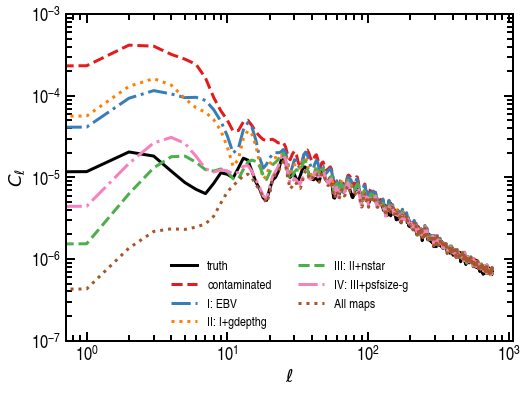

In [33]:
md.plt.figure(figsize=(8, 6))
for n_i, cl_i in cls.items():
    md.plt.loglog(cl_i, label=n_i, lw=3)
    
#for cl_j in cl_clean:
#    md.plt.loglog(cl_j, color='C3', alpha=0.2, zorder=-1)
    
md.plt.legend(frameon=False, ncol=2, loc='lower center')
#md.plt.text(1.5, 5.0e-5, 'cleaned', color='C3')
md.plt.ylim(1.0e-7, 1.0e-3)

md.plt.xlabel(r'$\ell$')
md.plt.ylabel(r'$C_{\ell}$')

Text(0, 0.5, '$C_{\\ell}$')

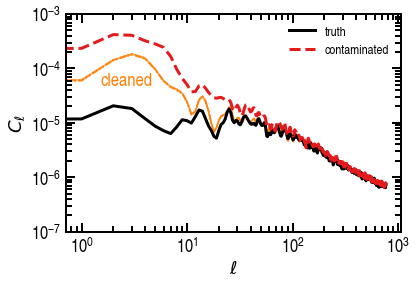

In [22]:
for n_i, cl_i in cls.items():
    md.plt.loglog(cl_i, label=n_i, lw=3)
    
for cl_j in cl_clean:
    md.plt.loglog(cl_j, color='C3', alpha=0.2, zorder=-1)
    
md.plt.legend(frameon=False)
md.plt.text(1.5, 5.0e-5, 'cleaned', color='C3')
md.plt.ylim(1.0e-7, 1.0e-3)
md.plt.xlabel(r'$\ell$')
md.plt.ylabel(r'$C_{\ell}$')

## Cleaned data
First we prepare the data into `hpix`, `features`, `label`, and `fracgood`.

In [ ]:
for r in ['bmzls', 'ndecals', 'sdecals']:
    
    table = f'/fs/ess/PHS0336/data/rongpu/imaging_sys/tables/0.57.0/nlrg_features_{r}_256.fits'
    dt = ft.read(table)
    
    ra, dec = hpix2radec(256, dt['hpix'])
    plt.scatter(shiftra(ra[::50]), np.sin(np.radians(dec[::50])), 1, marker='.')
    
plt.xlabel('RA [deg]')
plt.ylabel('sin(DEC [deg])')

Now, let's combine BASS/MzLS with DECaLS North into NGC

In [ ]:
bmzls = ft.read('/fs/ess/PHS0336/data/rongpu/imaging_sys/tables/0.57.0/nlrg_features_bmzls_256.fits')
ndecals = ft.read('/fs/ess/PHS0336/data/rongpu/imaging_sys/tables/0.57.0/nlrg_features_ndecals_256.fits')

common = np.intersect1d(bmzls['hpix'], ndecals['hpix'])
ngc = np.concatenate([bmzls, ndecals])

mask_comm = np.in1d(ngc['hpix'], common)
ngc_comm = ngc[mask_comm]
ngc_comm = np.sort(ngc_comm, order='hpix')
commons = np.zeros(common.size, dtype=ngc_comm.dtype)

for key in commons.dtype.names:
    
    if key=='hpix':
        commons[key] = ngc_comm[key][:-1:2]
    elif key in ['label', 'fracgood']:
        commons[key] = (ngc_comm[key][:-1:2]+ngc_comm[key][1::2])
    elif key=='features':
        commons[key] = (ngc_comm[key][:-1:2]+ngc_comm[key][1::2]) / 2.0
    else:
        print(key)
        
ngc_unique = ngc[~mask_comm]
combined = np.concatenate([ngc_unique, commons])
assert ngc.size ==2*commons.size+ngc_unique.size        

ft.write('/fs/ess/PHS0336/data/rongpu/imaging_sys/tables/0.57.0/nlrg_features_ngc_256.fits', combined)

Combine NGC and DECaLS S into desi

In [ ]:
ngc = ft.read('/fs/ess/PHS0336/data/rongpu/imaging_sys/tables/0.57.0/nlrg_features_ngc_256.fits')
sdecals = ft.read('/fs/ess/PHS0336/data/rongpu/imaging_sys/tables/0.57.0/nlrg_features_sdecals_256.fits')

common = np.intersect1d(sdecals['hpix'], ngc['hpix'])
assert len(common) == 0
desi = np.concatenate([ngc, sdecals])

ft.write('/fs/ess/PHS0336/data/rongpu/imaging_sys/tables/0.57.0/nlrg_features_desi_256.fits', desi)

In [ ]:
ls /fs/ess/PHS0336/data/rongpu/imaging_sys/tables/0.57.0/ -altr

## Bin C$_{\ell}$

In [ ]:
def bin_clmock(fnl, survey):    
    #ell_edges = np.array([2] + [10*i for i in range(1,10)] + [100+i*20 for i in range(5)] + [200+i*50 for i in range(3)])
    ell_edges = np.array([2, 6, 10, 14, 18, 22, 26] \
                       + [10*i for i in range(3,10)] \
                       + [100+i*20 for i in range(5)] \
                       + [200+i*50 for i in range(3)])

    cl_mocks = np.load(f'/fs/ess/PHS0336/data/lognormal/v2/clustering/clmock_{fnl}_{survey}.npy')
    nmocks, lmax = cl_mocks.shape

    ell = np.arange(lmax)
    cl_mocks_binned = []
    for cl_i in cl_mocks:
        ell_bin, cl_bin = histogram_cell(ell, cl_i, bins=ell_edges)
        cl_mocks_binned.append(cl_bin)
    cl_mocks_binned = np.array(cl_mocks_binned)

    nbins = ell_edges.size-1
    assert (cl_mocks_binned.shape[1]==nbins)

    hf = (nmocks - 1.0)/(nmocks - nbins - 2.0)
    cl_cov = np.cov(cl_mocks_binned, rowvar=False)*hf #/ nmocks
    inv_cov = np.linalg.inv(cl_cov)
    print(f'Hartlap with #mocks ({nmocks}) and #bins ({nbins}): {hf:.2f}' )

    #fg, ax = plt.subplots(ncols=2, figsize=(12, 4))
    #ax[0].imshow(inv_cov, origin='lower')
    #ax[1].imshow(inv_cov.dot(cl_cov), origin='lower')

    np.savez(f'/fs/ess/PHS0336/data/lognormal/v2/clustering/clmock_{fnl}_{survey}_mean.npz',
         **{'el_edges':ell_edges, 'el_bin':ell_bin, 'cl':cl_mocks_binned.mean(axis=0)})

    np.savez(f'/fs/ess/PHS0336/data/lognormal/v2/clustering/clmock_{fnl}_{survey}_cov.npz',
         **{'el_edges':ell_edges, 'el_bin':ell_bin, 'clcov':cl_cov})

In [ ]:
ls /fs/ess/PHS0336/data/lognormal/v2/clustering/cl*

In [ ]:
fnl = 'zero'
for survey in ['ndecals', 'sdecals',
               'ngc', 'desi', 'fullsky', 'bmzls']:

    bin_clmock(fnl, survey)
    print(f'{survey} done.')

In [ ]:
fnl = 'po100'
for survey in ['ndecals', 'sdecals', 'bmzls']:

    bin_clmock(fnl, survey)
    print(f'{survey} done.')

## MCMC

In [ ]:
hwidth=0.1
width=0.001
kw = dict(shape='full', width=width, 
          head_width=hwidth, alpha=0.8)  
kw2 = dict(bbox={'facecolor': 'w', 'alpha': 0.5, 'pad': 10})

for r in ['bmzls', 'ndecals', 'sdecals']:
    
    noweight = read_chain(f'/fs/ess/PHS0336/data/rongpu/imaging_sys/mcmc/0.57.0/mcmc_lrg_zero_{r}_noweight_steps10k_walkers50.npz')[1]
    nnknown = read_chain(f'/fs/ess/PHS0336/data/rongpu/imaging_sys/mcmc/0.57.0/mcmc_lrg_zero_{r}_nn_known_steps10k_walkers50.npz')[1]
    nnall = read_chain(f'/fs/ess/PHS0336/data/rongpu/imaging_sys/mcmc/0.57.0/mcmc_lrg_zero_{r}_nn_all_steps10k_walkers50.npz')[1]

    names = ['fnl', 'b', 'n0']
    labels = ['f_{NL}', 'b', '10^{7}N_{shot}']

    nw_ = MCSamples(samples=noweight, names=names, labels=labels, label='No Weight')
    nk_ = MCSamples(samples=nnknown, names=names, labels=labels, label='Conservative')
    na_ = MCSamples(samples=nnall, names=names, labels=labels, label='Extreme')

    # Triangle plot
    g = plots.get_subplot_plotter(width_inch=8)
    g.triangle_plot([nw_, nk_, na_], filled=True)
    g.subplots[2, 0].set_xticklabels([])
    
    mparams = nw_.samples.mean(axis=0)
    dparams = mparams - nk_.samples.mean(axis=0)
    g.subplots[2, 0].arrow(mparams[0], mparams[-1], -dparams[0], 0, color='C1', **kw)
    g.subplots[2, 0].text(mparams[0]-0.5*dparams[0], mparams[-1]+0.2, '%.1f'%dparams[0], color='C1', **kw2)
    
    mparams = nw_.samples.mean(axis=0)
    dparams = mparams - na_.samples.mean(axis=0)
    g.subplots[2, 0].arrow(mparams[0], mparams[-1]-2, -dparams[0], 0, color='C2', **kw)
    g.subplots[2, 0].text(mparams[0]-0.5*dparams[0], mparams[-1]-1.8, '%.1f'%dparams[0], color='C2', **kw2)    
    
    g.fig.align_labels()
    g.fig.legend(title=r.upper())
    plt.show()
    

In [ ]:
hwidth=0.1
width=0.001
kw = dict(shape='full', width=width, 
          head_width=hwidth, alpha=0.8)
kw2 = dict(bbox={'facecolor': 'w', 'alpha': 0.5, 'pad': 10})
            
for r in ['noweight', 'nn_known', 'nn_all']:
    
    noweight = read_chain(f'/fs/ess/PHS0336/data/rongpu/imaging_sys/mcmc/0.57.0/mcmc_lrg_zero_bmzls_{r}_steps10k_walkers50.npz')[1]
    nnknown = read_chain(f'/fs/ess/PHS0336/data/rongpu/imaging_sys/mcmc/0.57.0/mcmc_lrg_zero_ndecals_{r}_steps10k_walkers50.npz')[1]
    nnall = read_chain(f'/fs/ess/PHS0336/data/rongpu/imaging_sys/mcmc/0.57.0/mcmc_lrg_zero_sdecals_{r}_steps10k_walkers50.npz')[1]

    names = ['fnl', 'b', 'n0']
    labels = ['f_{NL}', 'b', '10^{7}N_{shot}']

    nw_ = MCSamples(samples=noweight, names=names, labels=labels, label='BASS/MzLS')
    nk_ = MCSamples(samples=nnknown, names=names, labels=labels, label='DECaLS N')
    na_ = MCSamples(samples=nnall, names=names, labels=labels, label='DECaLS S')

    # Triangle plot
    g = plots.get_subplot_plotter(width_inch=8)
    g.triangle_plot([nw_, nk_, na_], filled=True)
    g.subplots[2, 0].set_xticklabels([])
    
    mparams = nw_.samples.mean(axis=0)
    dparams = mparams - nk_.samples.mean(axis=0)
    g.subplots[2, 0].arrow(mparams[0], mparams[-1], -dparams[0], 0, color='C1', **kw)
    g.subplots[2, 0].text(mparams[0]-0.5*dparams[0], mparams[-1]+0.2, '%.1f'%dparams[0], color='C1', **kw2)
    
    mparams = nw_.samples.mean(axis=0)
    dparams = mparams - na_.samples.mean(axis=0)
    g.subplots[2, 0].arrow(mparams[0], mparams[-1]-2, -dparams[0], 0, color='C2', **kw)
    g.subplots[2, 0].text(mparams[0]-0.5*dparams[0], mparams[-1]-1.8, '%.1f'%dparams[0], color='C2', **kw2)    
    
    g.fig.align_labels()
    g.fig.legend(title=r.upper())
    plt.show()    

In [ ]:
mparams = nw_.samples.mean(axis=0)
dparams = mparams - nk_.samples.mean(axis=0)
dparams[0]

In [ ]:
pstats = pd.DataFrame(stats,
                      index=['MAP [scipy]', 'MAP [chain]', 'Mean [chain]',
                             'Median [chain]', '16th', '84th']).T
pstats

In [ ]:
pstats = pd.DataFrame(stats,
                      index=['MAP [scipy]', 'MAP [chain]', 'Mean [chain]',
                             'Median [chain]', '16th', '84th']).T
pstats

In [ ]:
kw = dict(histtype='step', bins=100, range=(-290, 190), density=True)

plt.figure()#figsize=(10, 6))
plt.hist(fs[:, 0], alpha=0.2, **kw, label='Fullsky')
plt.hist(ngc[:, 0], **kw, label='NGC (BMzLS+NDECaLS)')
plt.hist(bnd[:, 0], color='k',ls='-', **kw, label='Joint (BMzLS+NDECaLS)')
plt.hist(bm[:, 0], **kw, ls='-', label='BMzLS')
plt.hist(nd[:, 0], **kw, label='NDECaLS')
plt.legend(loc=2)
_ = plt.xlabel(r'$f_{\rm NL}$')

In [ ]:
kw = dict(plot_datapoints=False, #truths=[0.0, 1.426, 5.24], truth_color='C2',
          labels=[r'$f_{NL}$', 'b', '$10^{7}n_{0}$'], plot_density=False,
          fill_contours=False, levels=[0.68, 0.95])

fig = corner.corner(fs, color='C0', **kw)
corner.corner(bm, fig=fig, color='C1', contour_kwargs=dict(linestyles='--'), **kw)
corner.corner(fss, fig=fig, color='C2', contour_kwargs=dict(linestyles='-.', alpha=0.8), **kw)
ax = fig.get_axes()

ax[1].text(0.3, 0.8, 'Full Sky', color='C0', transform=ax[1].transAxes)
ax[1].text(0.3, 0.65, 'BASS/MzLS', color='C1', transform=ax[1].transAxes)
ax[1].text(0.3, 0.5, 'Full Sky (scaled)', color='C2', transform=ax[1].transAxes)
#ax[1].text(0.3, 0.35, 'Truth', color='C2', transform=ax[1].transAxes)

# fig.savefig('mcmc_mocks.pdf', bbox_inches='tight')

In [ ]:
fs_ = fs.copy()
fs_m = fs_.mean(axis=0)
fs_ = fs_ - fs_m
fs_ /= np.sqrt(0.125)
fs_ += fs_m

kw = dict(plot_datapoints=False, truths=[0.0, 1.426, 5.24], truth_color='C2',
          labels=[r'$f_{NL}$', 'b', '$10^{7}n_{0}$'], plot_density=False,
          fill_contours=False, levels=[0.68, 0.95])

fig = corner.corner(fs_, color='C0', **kw)
corner.corner(bm, fig=fig, color='C1', contour_kwargs=dict(linestyles='--'), **kw)
ax = fig.get_axes()

ax[1].text(0.3, 0.8, 'Full Sky (scaled)', color='C0', transform=ax[1].transAxes)
ax[1].text(0.3, 0.65, 'BASS/MzLS', color='C1', transform=ax[1].transAxes)
ax[1].text(0.3, 0.5, 'Truth', color='C2', transform=ax[1].transAxes)

# fig.savefig('mcmc_mocks.pdf', bbox_inches='tight')

## Feature selection

In [23]:
fr = ft.read('/fs/ess/PHS0336/data/rongpu/imaging_sys/tables/0.57.0/nlrg_features_bmzls_256.fits')['features']

In [24]:
maps_dr9 = ['ebv', 'nstar']\
            + [f'galdepth_{b}' for b in ['r', 'g', 'z']]\
            + [f'psfdepth_{b}' for b in ['r', 'g', 'z', 'w1', 'w2']] \
            + [f'psfsize_{b}' for b in ['r', 'g', 'z']]

In [25]:
ccf = np.corrcoef(fr, rowvar=False)
ccf.max(), ccf.min()

(1.0, -0.5124436766967613)

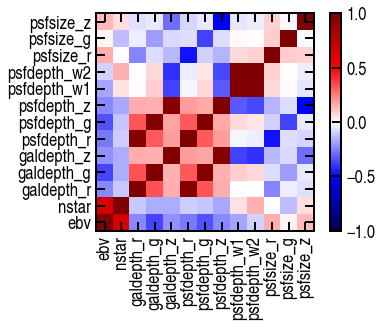

In [26]:
fg, ax = plt.subplots()

mp = ax.imshow(ccf, cmap='seismic', origin='lower', vmin=-1.0, vmax=1.0)
fg.colorbar(mp)

ax.set_xticks(np.arange(len(maps_dr9)))
ax.set_xticklabels(maps_dr9, rotation=90)
ax.set_yticks(np.arange(len(maps_dr9)))
_ = ax.set_yticklabels(maps_dr9)

In [ ]:
model = src.LinearRegression(add_bias=True)

In [ ]:
def run_rfe(filename):
 
    maps_dr9 = ['ebv', 'nstar']\
                + [f'galdepth_{b}' for b in ['r', 'g', 'z']]\
                + [f'psfdepth_{b}' for b in ['r', 'g', 'z', 'w1', 'w2']] \
                + [f'psfsize_{b}' for b in ['r', 'g', 'z']]

    dl = src.MyDataLoader(filename, 
                          do_kfold=True, seed=85)
    axes = []
    for i in range(5):
        fs = src.FeatureElimination(model, dl.load_data(-1, i))
        fs.run([j for j in range(13)])
        axes.append(fs.results['axes_to_keep'])


    #     fs.plot(labels=maps_dr9, cmap='seismic', vmin=0.99, vmax=1.01)
    
    weights = [[(1.+i)/len(axes_i) for i in range(len(axes_i))] for axes_i in axes]

    axes_ = []
    for axi in axes:
        for axj in axi:
            axes_.append(axj)

    weights_ = []
    for wt in weights:
        for wj in wt:
            weights_.append(wj)

    plt.hist(axes_, weights=weights_, bins=np.arange(13), align='left', width=0.8)
    plt.xticks(ticks=np.arange(13), labels=maps_dr9, rotation=90)
    plt.xlim(-1, 13)
    plt.ylim(0, 5.2)

In [ ]:
run_rfe('/fs/ess/PHS0336/data/rongpu/imaging_sys/tables/0.57.0/nlrg_features_bmzls_256.fits')

In [ ]:
run_rfe('/fs/ess/PHS0336/data/lognormal/v0/tables/bmzls/nlrg-10-bmzls.fits')

In [ ]:
maps_dr9 = ['ebv', 'nstar']\
            + [f'galdepth_{b}' for b in ['r', 'g', 'z']]\
            + [f'psfdepth_{b}' for b in ['r', 'g', 'z', 'w1', 'w2']] \
            + [f'psfsize_{b}' for b in ['r', 'g', 'z']]

In [ ]:
r = 'bmzls'
def run_pcc(r):
    
    dt = ft.read(f'/fs/ess/PHS0336/data/rongpu/imaging_sys/tables/0.57.0/nlrg_features_{r}_256.fits')
    pcc_d, = pcc(dt['features'], dt['label'], return_err=False)

    pcc_m = []
    for filename in glob(f'/fs/ess/PHS0336/data/lognormal/v0/tables/{r}/nlrg-*-{r}.fits')[:100]:
        mc = ft.read(filename)
        pcc_, = pcc(mc['features'], mc['label'], return_err=False)
        pcc_m.append(pcc_)
        
    plt.bar(np.arange(13), pcc_d, alpha=0.4)#, label='DR9 BMzLS')        
    for pcc_i in pcc_m:
        plt.plot(pcc_i, lw=1, alpha=0.2, ls='-', c='C1')
    # plt.xticks(ticks=np.arange(len(maps_dr9)), labels=maps_dr9, rotation=90)
    plt.ylabel('PCC')
    # plt.legend()
    _ = plt.xticks(ticks=np.arange(13), labels=maps_dr9, rotation=90)        

In [ ]:
run_pcc(r)

In [ ]:
run_pcc('ndecals')

In [ ]:
run_pcc('sdecals')

In [12]:
r = 'bmzls'

maps_dr9 = ['ebv', 'nstar']\
            + [f'galdepth_{b}' for b in ['r', 'g', 'z']]\
            + [f'psfdepth_{b}' for b in ['r', 'g', 'z', 'w1', 'w2']] \
            + [f'psfsize_{b}' for b in ['r', 'g', 'z']]

dt = ft.read(f'/fs/ess/PHS0336/data/rongpu/imaging_sys/tables/0.57.0/nlrg_features_{r}_256.fits')


mc = hp.read_map('/fs/ess/PHS0336/data/lognormal/v2/hpmaps/lrghp-zero-1-f1z1-contaminated.fits')
pcc_d, pcc_e = pcc(dt['features'], mc[dt['hpix']], return_err=True)

/users/PHS0336/medirz90/miniconda3/envs/sysnet/lib/python3.8/site-packages/healpy/fitsfunc.py:351: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  warnings.warn(


NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


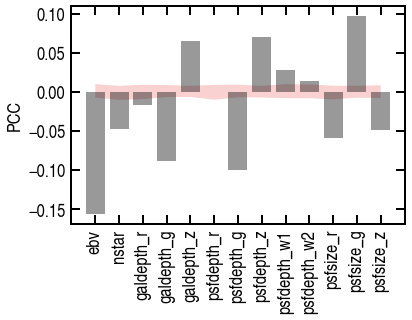

In [13]:
plt.bar(np.arange(13), pcc_d, alpha=0.4)#, label='DR9 BMzLS')        
plt.fill_between(np.arange(13), *np.percentile(pcc_e, [0, 100], axis=0), alpha=0.2)
plt.ylabel('PCC')
# plt.legend()
_ = plt.xticks(ticks=np.arange(13), labels=maps_dr9, rotation=90)        

## Mean Density After Feature Selection

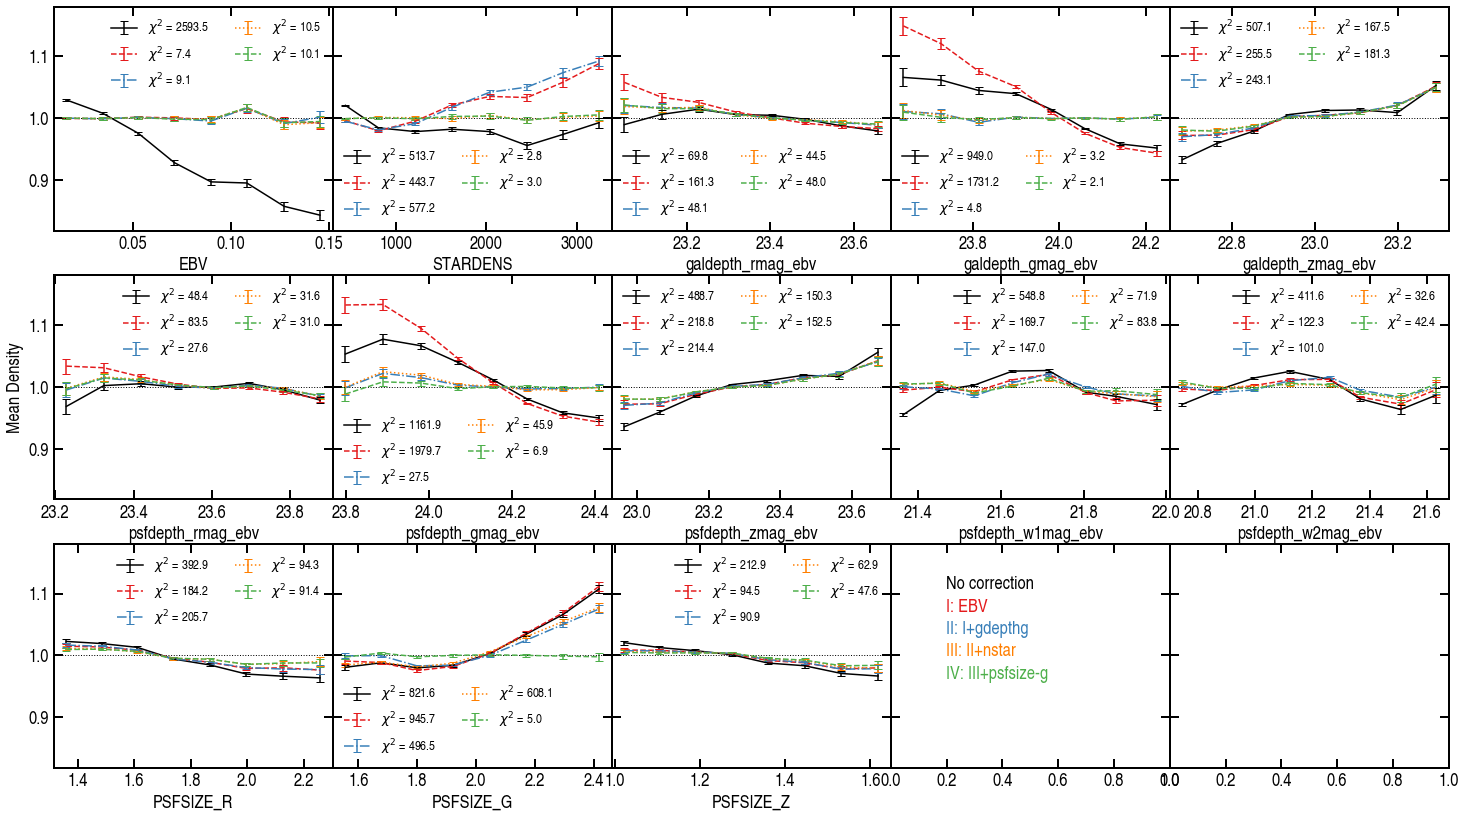

In [17]:
p_ = '/fs/ess/PHS0336/data/lognormal/v2/clustering/'
names = ['No correction', 'I: EBV', 'II: I+gdepthg', 'III: II+nstar', 'IV: III+psfsize-g']
for r in ['bmzls',]: #  'ndecals', 'sdecals'
    
    nbars = {}
    for n in ['noweight', 'nn_known1', 'nn_known4', 'nn_known5', 'nn_known6']:
        nbars[n] = md.np.load(f'{p_}nbarmock_1_1_lrg_zero_{r}_256_{n}.npy', allow_pickle=True)
        
    fg, ax = md.plt.subplots(nrows=3, ncols=5, figsize=(25, 14), sharey=True)
    ax = ax.flatten()
    fg.subplots_adjust(wspace=0.0)

    def errorbar(axi, *arrays, **kwargs):
        _, y, ye = arrays
        chi2 = (((y-1)/ye)**2).sum()
        axi.errorbar(*arrays, **kwargs, label=fr'$\chi^{2}$ = {chi2:.1f}')

    for i in range(13):
        for j, n in enumerate(nbars.keys()):
            errorbar(ax[i], nbars[n][i]['bin_avg'], nbars[n][i]['nnbar'], nbars[n][i]['nnbar_err'], capsize=4)
            if i==12:
                ax[13].text(0.2, 0.8-0.1*j, names[j], transform=ax[13].transAxes, color='C%s'%j)
        ax[i].axhline(1.0, ls=':', lw=1)
        ax[i].set_xlabel(nbars['noweight'][i]['sys'])
        ax[i].legend(ncol=2)
        
    # plt.plot(nbars['nn'])
    ax[5].set_ylabel('Mean Density')

    # plt.plot(nbars['noweight'])
    fg.show()

In [ ]:
p_ = '/fs/ess/PHS0336/data/rongpu/imaging_sys/clustering/0.57.0/'
for r in ['bmzls', 'ndecals', 'sdecals']:
    
    nbars = {}
    for n in ['noweight', 'nn_known', 'nn_all']:
        nbars[n] = np.load(f'{p_}nbar_lrg_{r}_256_{n}.npy', allow_pickle=True)
        
    fg, ax = plt.subplots(nrows=3, ncols=5, figsize=(25, 14), sharey=True)
    ax = ax.flatten()
    fg.subplots_adjust(wspace=0.0)

    def errorbar(axi, *arrays, **kwargs):
        _, y, ye = arrays
        chi2 = (((y-1)/ye)**2).sum()
        axi.errorbar(*arrays, **kwargs, label=fr'$\chi^{2}$ = {chi2:.1f}')

    for i in range(13):
        for n in nbars.keys():
            errorbar(ax[i], nbars[n][i]['bin_avg'], nbars[n][i]['nnbar'], nbars[n][i]['nnbar_err'], capsize=4)

        ax[i].axhline(1.0, ls=':', lw=1)
        ax[i].set_xlabel(nbars['nn_known'][i]['sys'])
        ax[i].legend()
    # plt.plot(nbars['nn'])
    ax[5].set_ylabel('Mean Density')
    # plt.plot(nbars['noweight'])
    fg.show()

In [ ]:
ell_edges = np.array([2, 6, 10, 14, 18, 22, 26] \
                   + [10*i for i in range(3,10)] \
                   + [100+i*20 for i in range(5)] \
                   + [200+i*50 for i in range(3)])


fg, ax = plt.subplots(ncols=3, figsize=(18, 4), sharey=True)
fg.subplots_adjust(wspace=0.0)

names = ['No treatment', 'Conservative', 'Extreme']
markers = ['.', 'o', 'x']

for i, r in enumerate(['bmzls', 'ndecals', 'sdecals']):
    
    for j,method in enumerate(['noweight', 'nn_known', 'nn_all']):



        cl = np.load(f'/fs/ess/PHS0336/data/rongpu/imaging_sys/clustering/0.57.0/cl_lrg_{r}_256_{method}.npy', 
                     allow_pickle=True).item()
        lb, clb = histogram_cell(cl['cl_gg']['l'], cl['cl_gg']['cl'], bins=ell_edges)

        ln = ax[i].plot(cl['cl_gg']['cl'], alpha=0.2)
        ax[i].plot(lb, clb, marker=markers[j], 
                   ls='None', color=ln[0].get_color(), label=names[j], mfc='w', alpha=0.9)
        
    ax[i].set(yscale='log', xscale='log', ylim=(1.0e-7, 2.0e-4), xlim=(0.8, 900), xlabel=r'$\ell$')

ax[0].set(ylabel=r'$C_{\ell}$')
ax[2].legend()

In [ ]:
def bin_cldr9(r, method): 
    
    ell_edges = np.array([2, 6, 10, 14, 18, 22, 26] \
                       + [10*i for i in range(3,10)] \
                       + [100+i*20 for i in range(5)] \
                       + [200+i*50 for i in range(3)])

    cl = np.load(f'/fs/ess/PHS0336/data/rongpu/imaging_sys/clustering/0.57.0/cl_lrg_{r}_256_{method}.npy', 
                 allow_pickle=True).item()
    lb, clb = histogram_cell(cl['cl_gg']['l'], cl['cl_gg']['cl'], bins=ell_edges)
    
    np.savez(f'/fs/ess/PHS0336/data/rongpu/imaging_sys/clustering/0.57.0/clgg_lrg_{r}_256_{method}.npz',
         **{'el_edges':ell_edges, 'el_bin':lb, 'cl':clb})

In [ ]:
for r in ['bmzls', 'ndecals', 'sdecals']:
    for m in ['noweight', 'nn_known', 'nn_all']:
        bin_cldr9(r, m)

In [ ]:
run_rfe('sdecals')

In [ ]:
## Mean Density mocks

In [ ]:
region = 'bmzls'
print(f'region: {region}')

list_nbars = glob(f'/fs/ess/PHS0336/data/lognormal/v0/clustering/nbarmock_*_lrg_{region}_256_noweight.npy')
err_mat = read_nbmocks(list_nbars)

In [ ]:
print('# mocks', len(list_nbars))
invcov, covmax = get_inv(err_mat, True)

In [ ]:
np.diagonal(covmax)**0.5

In [ ]:
covmax.shape[0]/13

In [ ]:
d_ = np.load(f'/fs/ess/PHS0336/data/lognormal/v0/clustering/nbarmock_1_lrg_bmzls_256_noweight.npy', allow_pickle=True)

In [ ]:
edges = []
for d_i in d_:
    edges.append(d_i['bin_edges'])

In [ ]:
edge_ = np.array(edges).flatten()

In [ ]:
edge_[27:27+9]

In [ ]:
class Data:
    def __init__(self, dt):
        self.ng = make_hp(256, dt['hpix'], dt['label'])
        self.pix = dt['hpix']
        self.nr = make_hp(256, dt['hpix'], dt['fracgood'])
        self.ebv = make_hp(256, dt['hpix'], dt['features'][:, 0])

In [ ]:
bm = Data(bmzls)
nd = Data(ndecals)

In [ ]:
common = np.intersect1d(bm.pix, nd.pix)

In [ ]:
plt.scatter(common, bm.nr[common], c=bm.ng[common], cmap='jet', vmin=0, vmax=60)
plt.scatter(common, nd.nr[common], c=nd.ng[common], cmap='jet', vmin=0, vmax=60)
plt.colorbar()

In [ ]:
plt.scatter(np.arange(common.size), bm.ebv[common], 1, alpha=0.3)
plt.scatter(np.arange(common.size), nd.ebv[common], 1)
plt.scatter(np.arange(common.size), ebvc[common], 1)
plt.xlim([-1, 10])

In [ ]:
ngc = np.concatenate([bmzls, ndecals])
ngc.size, bmzls.size+ndecals.size

In [ ]:
commons = np.in1d(ngc['hpix'], common)
ngc_ = ngc[commons]

In [ ]:
common.size

In [ ]:
commons = np.zeros(common.size, dtype=ngc_.dtype)

In [ ]:
for key in commons.dtype.names:
    commons[key] = (ngc_[key][:-1:2]+ngc_[key][1::2]) / 2.0

In [ ]:
ebvc = make_hp(256, commons['hpix'], commons['features'][:, 0])

In [ ]:
ngc_['hpix'][:-1:2][:10]

In [ ]:
ngc_['hpix'][1::2][:10]

## Parameter Fitting Mocks
### Best Fit on individual mocks

In [ ]:
params = {}

for r in ['fullsky', 'bmzls']:
    bf = np.load(f'/fs/ess/PHS0336/data/lognormal/v0/mcmc/bestfit_{r}_noweight_fine.npz')

    if np.all(bf['success']):print(f'{r} all best fit optimizers termined successfully!')
    p = bf['params']
    p[:, 2] *= 1.0e7  # scale shotnoise term
    
    params[r] = p

In [ ]:
fg = corner.corner(params['fullsky'], labels=[r'$f_{NL}$', 'b', '$10^{7}n_{0}$'], truths=[0.0, 1.426, 5.24], truth_color='C2',
              **dict(fill_contours=False, plot_density=False, plot_contours=False, data_kwargs={'alpha':0.8}))
corner.corner(params['bmzls'], labels=[r'$f_{NL}$', 'b', '$10^{7}n_{0}$'], fig=fg, color='C1',
              **dict(fill_contours=False, plot_density=False, plot_contours=False, data_kwargs={'alpha':0.8}))
fg.align_labels()

ax = fg.get_axes()
ax[1].text(0.3, 0.8, 'Full Sky', color='C0', transform=ax[1].transAxes)
ax[1].text(0.3, 0.65, 'BASS/MzLS', color='C1', transform=ax[1].transAxes)
ax[1].text(0.3, 0.5, 'Truth', color='C2', transform=ax[1].transAxes)
# fg.savefig('bestfit_mocks.pdf', bbox_inches='tight')
fg.show()

In [ ]:
params['fullsky'].std(axis=0)/params['bmzls'].std(axis=0), np.sqrt(0.125)

### MCMC on mean of mocks

In [ ]:
stats = {}

stats['BASS/MzLS'], bm = read_chain('/fs/ess/PHS0336/data/lognormal/v0/mcmc/mcmc_lrg_bmzls_noweight_steps10000_walkers50.npz')
stats['Full Sky'], fs = read_chain('/fs/ess/PHS0336/data/lognormal/v0/mcmc/mcmc_lrg_fullsky_noweight_steps10000_walkers50.npz')

kw = dict(plot_datapoints=False, truths=[0.0, 1.426, 5.24], truth_color='C2',
          labels=[r'$f_{NL}$', 'b', '$10^{7}n_{0}$'], plot_density=False,
          fill_contours=False, levels=[0.68, 0.95])

fig = corner.corner(fs, color='C0', **kw)
corner.corner(bm, fig=fig, color='C1', contour_kwargs=dict(linestyles='--'), **kw)
ax = fig.get_axes()

ax[1].text(0.3, 0.8, 'Full Sky', color='C0', transform=ax[1].transAxes)
ax[1].text(0.3, 0.65, 'BASS/MzLS', color='C1', transform=ax[1].transAxes)
ax[1].text(0.3, 0.5, 'Truth', color='C2', transform=ax[1].transAxes)

# fig.savefig('mcmc_mocks.pdf', bbox_inches='tight')

In [ ]:
pstats = pd.DataFrame(stats,
                      index=['MAP [scipy]', 'MAP [chain]', 'Mean [chain]',
                             'Median [chain]', '16th', '84th']).T
pstats

In [ ]:
(22.65+13.9)/(33.02+104.22), np.sqrt(0.125)

In [ ]:
fs_ = fs.copy()
fs_m = fs_.mean(axis=0)
fs_ = fs_ - fs_m
fs_ /= np.sqrt(0.125)
fs_ += fs_m

kw = dict(plot_datapoints=False, truths=[0.0, 1.426, 5.24], truth_color='C2',
          labels=[r'$f_{NL}$', 'b', '$10^{7}n_{0}$'], plot_density=False,
          fill_contours=False, levels=[0.68, 0.95])

fig = corner.corner(fs_, color='C0', **kw)
corner.corner(bm, fig=fig, color='C1', contour_kwargs=dict(linestyles='--'), **kw)
ax = fig.get_axes()

ax[1].text(0.3, 0.8, 'Full Sky (scaled)', color='C0', transform=ax[1].transAxes)
ax[1].text(0.3, 0.65, 'BASS/MzLS', color='C1', transform=ax[1].transAxes)
ax[1].text(0.3, 0.5, 'Truth', color='C2', transform=ax[1].transAxes)

# fig.savefig('mcmc_mocks.pdf', bbox_inches='tight')

In [ ]:
fg, ax = plt.subplots(nrows=2, ncols=2, 
                      figsize=(12, 8), sharex=True, 
                      sharey='row')
fg.subplots_adjust(hspace=0.0, wspace=0.0)
ax = ax.flatten()

kw = dict(density=True, histtype='step', bins=np.arange(-300, 300, 8))
ax[0].hist(fs[:, 0], **kw, label='MCMC Mean')
ax[0].hist(params['fullsky'][:, 0], **kw, label='BestFit Individual')
ax[0].set_yticklabels([])
ax[0].legend(loc=2)
ax[0].set(title='Fullsky')
ax[2].scatter(*fs[:, :2].T, 1.)
ax[2].scatter(*params['fullsky'][:, :2].T, 1.)
ax[2].set(xlabel=r'f$_{\rm NL}$', ylabel='b')


kw = dict(density=True, histtype='step', bins=np.arange(-300, 300, 8))
ax[1].hist(bm[:, 0], **kw, label='MCMC Mean')
ax[1].hist(params['bmzls'][:, 0], **kw, label='BestFit Individual')
ax[1].set_yticklabels([])
ax[1].set(title='BMzLS')
ax[1].legend(loc=2)
ax[3].scatter(*bm[:, :2].T, 1.)
ax[3].scatter(*params['bmzls'][:, :2].T, 1.)
ax[3].set(xlabel=r'f$_{\rm NL}$', ylabel='b')

## Model Spectrum

In [ ]:
bm = np.load('/fs/ess/PHS0336/data/lognormal/v0/mcmc/mcmc_lrg_bmzls_noweight_steps10000_walkers50.npz')

zbdndz = init_sample(kind='lrg')

# read survey geometry
dt = ft.read(f'/fs/ess/PHS0336/data/rongpu/imaging_sys/tables/0.57.0/nlrg_features_bmzls_256.fits')
w = np.zeros(12*256*256)
w[dt['hpix']] = 1.0
weight = hp.ud_grade(w, 1024)
mask = weight > 0.5

model = Spectrum()
model.add_tracer(*zbdndz, p=1.6)
model.add_kernels(np.arange(2000))

wind = WindowSHT(weight, mask, np.arange(2048), ngauss=2048)


fnl, b, noise = bm['best_fit']
el_g = np.arange(2000)
cl_bf = model(el_g, fnl=fnl, b=b, noise=noise)
        
cl_bfw = wind.convolve(el_g, cl_bf)
lmax = max(el_g)+1
cl_bfwic = wind.apply_ic(cl_bfw[:lmax])

cl_ = np.load('/fs/ess/PHS0336/data/lognormal/v0/clustering/clmock_bmzls_noweight_mean_fine.npz')
el_edges = cl_['el_edges']
el = cl_['el_bin']
cl = cl_['cl']

cl_models = {}
for name, cl_i in zip(['Best Fit Model', '+ Window Convolution', '+ Integral Constraint'],
                      [cl_bf, cl_bfw[:2000], cl_bfwic[:2000]]):
    
    cl_models[name] = histogram_cell(el_g, cl_i, bins=el_edges)

In [ ]:
fig = plt.figure(figsize=(5, 5), constrained_layout=False)
gs = GridSpec(3, 1, figure=fig)

ax1 = fig.add_subplot(gs[:2, 0])
ax2 = fig.add_subplot(gs[2, 0])

f = 1.0e5
lw = [0.8, 0.8, 3.]
ls = ['-', '-', '-']
al = [1., 1., 0.7]
for i, (n, v) in enumerate(cl_models.items()):
    kw = dict(label=n, lw=lw[i], ls=ls[i], alpha=al[i])
    ax1.plot(v[0], f*v[1], **kw)
    ax2.plot(el, v[1]/cl, **kw)
    
ax1.plot(el, f*cl, 'C0--', label='Mean of Mocks')
ax2.axhline(1.0, color='C0', ls='--')


ax1.legend(ncol=1)
ax1.set(xscale='log', ylabel=r'$10^{5}C_{\ell}$')
ax1.tick_params(labelbottom=False)
ax2.set(xscale='log', xlabel=r'$\ell$', ylabel='Ratio')
ax2.set_xlim(ax1.get_xlim())
ax2.set(ylim=(0.94, 1.11))
for hline in [0.98, 1.02]:
    ax2.axhline(hline, ls=':', lw=1)

fig.subplots_adjust(hspace=0.0, wspace=0.02)
fig.align_labels()

# fig.savefig('model_window.pdf', bbox_inches='tight')

## Create C_ell for mocks with fNL != 0
Create cosmologies with fNL to test the pipeline

In [ ]:
z, b, dNdz = init_sample(kind='lrg', plot=True)

model = Spectrum()
model.add_tracer(z, b, dNdz, p=1.0)
model.add_kernels(np.arange(2000))

In [ ]:
fg, ax = plt.subplots()


el = np.arange(2000)
for fnl, name in zip([-200, -100, 0, 100, 200],
                     ['ne200', 'ne100', 'zero', 'po100', 'po200']):
    
    cl_raw = model(el, fnl=fnl, b=1.43)
    ax.plot(cl_raw, label='%.1f'%fnl)
    np.savetxt(f'/users/PHS0336/medirz90/github/flask/data/desiCl{name}-f1z1f1z1.dat', 
               np.column_stack([el, cl_raw]), header='# el -- Cel')
    
ax.set(xlim=(-1, 22), yscale='log', xlabel=r'$\ell$', 
       ylim=(2.0e-7, 3.0e-2), ylabel=r'$C_\ell$')
ax.legend(ncol=2)
#bbox_to_anchor=(1.5, 1.))
#ax[1].set(xlim=(1, 700))

## Test Window with fNL mocks

In [ ]:
zbdndz = init_sample(kind='lrg')

# read survey geometry
dt = ft.read(f'/fs/ess/PHS0336/data/rongpu/imaging_sys/tables/0.57.0/nlrg_features_bmzls_256.fits')
w = np.zeros(12*256*256)
w[dt['hpix']] = 1.0
weight = hp.ud_grade(w, 1024)
mask = weight > 0.5

model = SurveySpectrum()
model.add_tracer(*zbdndz, p=1.0)
model.add_kernels(np.arange(2000))

In [ ]:
model.add_window(weight, mask, np.arange(2048), ngauss=2048)

In [ ]:
cl_fs = np.load('/fs/ess/PHS0336/data/lognormal/v2/clustering/clmock_po100_bmzls.npy')
# cl_bm = np.load('/fs/ess/PHS0336/data/lognormal/v1/clustering/clmock_lrg-ne200_bmzls.npy')

In [ ]:
fg, ax = plt.subplots()

el = np.arange(768)

for cl_i, name_i in zip([cl_fs], 
                        ['Fullsky']):
    
    ln, = ax.plot(cl_i.mean(axis=0), label=name_i, lw=0.8)
    ax.fill_between(el, *np.percentile(cl_i, [16, 84], axis=0), 
                    color=ln.get_color(), alpha=0.1)
    
    
ax.plot(el, model(el, fnl=40, b=1.43, noise=5.0e-7), label='Model', lw=3, ls='-', zorder=-10)
ax.legend()
ax.set(xscale='log', yscale='log', ylim=(1.0e-7, 1.0e-3),
      xlabel=r'$\ell$', ylabel=r'C$_{\ell}$')

In [ ]:
from sympy.physics.wigner import wigner_3j

In [ ]:
nside = 256
weight, mask = read_window('bmzls', nside=nside)

In [ ]:
from scipy.optimize import curve_fit

def model(l, *p):
    return p[0]*np.log10(l)+p[1]

def get_cl_wind(weight, mask, plot=False, nside=256):

    weight[~mask] = hp.UNSEEN
    cl_wind = hp.anafast(weight, lmax=2*nside)

    el_p = 10
    el = np.arange(5000)
    is_small = el < el_p

    lmin = 10
    lmax = 2*nside-1
    x = np.arange(lmin, lmax+1)
    y = cl_wind[lmin:lmax+1]
    res = curve_fit(model, x, np.log10(y), p0=[1, 1])

    cl_window = np.zeros(el.size)
    cl_window[:el_p] = cl_wind[:el_p]
    cl_window[~is_small] = 10**model(el[~is_small], *res[0])
    
    if plot:
        x_g = np.arange(el_p, 5000)
        plt.plot(cl_wind, alpha=0.2, lw=4)
        plt.plot(cl_window, alpha=0.4, lw=2, ls='-')
        plt.plot(x_g, 10**model(x_g, *res[0]), lw=1)
        plt.xscale('log')
        plt.yscale('log')    
        
    return cl_window

In [ ]:
cl_w = get_cl_wind(weight, mask, plot=True)

In [ ]:
l1 = np.arange(31)
l2 = np.arange(100)
l3 = np.arange(200)

mixm = np.zeros((l1.size, l2.size))
for l1_ in l1:
    print('.', end='')
    
    for l2_ in l2:
        l3sum_ = 0.0        
        for l3_ in l3:
            l3sum_ += (2*l3_+1)*cl_w[l3_]*float(wigner_3j(l1_, l2_, l3_, 0, 0, 0))**2        
        mixm[l1_, l2_] = l3sum_*(2*l2_+1)/(4.*np.pi)
        

# res = float()
mixm

In [ ]:
fsky = mask.mean()
fsky

In [ ]:
plt.figure(figsize=(8, 5))

for ell in [2, 5, 10, 20, 30]:
    y_ = mixm[ell, :]/fsky
    line,  = plt.plot(y_)
    plt.text(np.argmax(y_)*1.05, y_.max()*1.01, r'$\ell$=%d'%ell, color=line.get_color())
    
plt.ylabel(r'M$_{\ell, \ell^{*}}$')
plt.xlabel(r'$\ell^{*}$')
plt.ylim(-0.01, .25)
# plt.legend()
plt.grid()

In [ ]:
plt.figure(figsize=(8, 5))

for ell in [2, 5, 10, 20, 30]:
    y_ = mixm[ell, :]/fsky
    line,  = plt.plot(y_)
    plt.text(np.argmax(y_)*1.05, y_.max()*1.01, r'$\ell$=%d'%ell, color=line.get_color())
    
plt.ylabel(r'M$_{\ell, \ell^{*}}$')
plt.xlabel(r'$\ell^{*}$')
plt.ylim(-0.01, .25)
# plt.legend()
plt.grid()
plt.xlim(xmax=60)

In [ ]:
el = np.arange(1000)
wind = WindowSHT(weight, mask, el)

In [ ]:
wind.read_rr('../scripts/bmzls_rr_window_256.npy', mask.sum(), 12*256*256)

In [ ]:
x_ = np.degrees(np.arccos(wind.x))

plt.plot(x_, wind.xi_mask, alpha=0.5, label='SHT Window')
plt.plot(x_, wind.xi_mask_smooth, label='SHT+RR Window')
                
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\omega$')
plt.xscale('symlog', linethreshx=1)
plt.legend(loc='lower left')#, title='BASS/MzLS')
# plt.axes([0.4,  ,0.45, 0.45, 0.35])


# plt.plot(x_, wind.xi_mask, alpha=0.5)
# plt.plot(x_, wind.xi_mask_smooth)
# plt.yscale('log')
# plt.ylim(-1.0e-6, 1.0e-5)
# plt.xlim(100, 190)
# plt.axis([90, 190, -4.0e-8, 3.5e-8])

In [ ]:
z, b, dNdz = init_sample(kind='lrg')

model = Spectrum()
model.add_tracer(z, b, dNdz, p=1.6)
model.add_kernels(np.arange(2000))

In [ ]:
fg, ax = plt.subplots(ncols=3, sharey=True, sharex=True, figsize=(18, 4))
fg.subplots_adjust(wspace=0.0)

el = np.arange(2000)
for fnl in [-200, 0, 200]:
    
    cl_raw = model(el, fnl=fnl, b=1.5)
    cl_w = wind.convolve(el, cl_raw)
    cl_w2 = mixm.dot(cl_raw[:100])/0.13
    
    ax[0].plot(cl_raw, label='%.1f'%fnl)
    ax[1].plot(cl_w)
    ax[2].plot(cl_w2)
    
ax[0].set(xlim=(-1, 22), yscale='log', ylim=(2.0e-7, 3.0e-2), ylabel=r'$C_\ell$')

titles = ['Model', '+ Window Convolution (SHT)', '+ Window Convolution (Mixing Mat)']
for i, axi in enumerate(ax):
    axi.set_title(titles[i])
    axi.set_xlabel(r'$\ell$')
ax[0].legend(ncol=2)#bbox_to_anchor=(1.5, 1.))
#ax[1].set(xlim=(1, 700))

In [ ]:
fg, ax = plt.subplots(ncols=3, sharey=True, sharex=True, figsize=(18, 4))
fg.subplots_adjust(wspace=0.0)

el = np.arange(2000)
for fnl in [-200, -100, -50, 0, 50, 100, 200]:
    cl_raw = model(el, fnl=fnl, b=1.5)
    cl_w = wind.convolve(el, cl_raw)
    cl_wic = wind.apply_ic(cl_w[:700])
    
    ax[0].plot(cl_raw, label='%.1f'%fnl)
    ax[1].plot(cl_w)
    ax[2].plot(cl_wic)
    
ax[0].set(xlim=(-1, 22), yscale='log', ylim=(2.0e-7, 3.0e-2), ylabel=r'$C_\ell$')

titles = ['Model', '+ Window Convolution', '+ Integral Constraint']
for i, axi in enumerate(ax):
    axi.set_title(titles[i])
    axi.set_xlabel(r'$\ell$')
ax[0].legend(ncol=2)#bbox_to_anchor=(1.5, 1.))
#ax[1].set(xlim=(1, 700))

In [ ]:
fg, ax = plt.subplots(ncols=3, sharey=True, sharex=True, figsize=(18, 4))
fg.subplots_adjust(wspace=0.0)

el = np.arange(2000)
for fnl in [-200, -100, -50, 0, 50, 100, 200]:
    cl_raw = model(el, fnl=fnl, b=1.5)
    cl_w = wind.convolve(el, cl_raw)
    cl_wic = wind.apply_ic(cl_w[:700])
    
    ax[0].plot(cl_raw, label='%.1f'%fnl)
    ax[1].plot(cl_w)
    ax[2].plot(cl_wic)
    
ax[0].set(xlim=(-1, 22), yscale='log', ylim=(2.0e-7, 3.0e-2), ylabel=r'$C_\ell$')

titles = ['Model', '+ Window Convolution', '+ Integral Constraint']
for i, axi in enumerate(ax):
    axi.set_title(titles[i])
    axi.set_xlabel(r'$\ell$')
ax[0].legend(ncol=2)#bbox_to_anchor=(1.5, 1.))
#ax[1].set(xlim=(1, 700))

In [ ]:
fg, ax = plt.subplots(ncols=3, sharey=True, sharex=True, figsize=(18, 4))
fg.subplots_adjust(wspace=0.0)

el = np.arange(2000)
for fnl in [-200, -100, -50, 0, 50, 100, 200]:
    cl_raw = model(el, fnl=fnl, b=1.5)
    cl_w = wind.convolve(el, cl_raw, with_smooth=True)
    cl_wic = wind.apply_ic(cl_w[:700])
    
    ax[0].plot(cl_raw, label='%.1f'%fnl)
    ax[1].plot(cl_w)
    ax[2].plot(cl_wic)
    
ax[0].set(xlim=(-1, 22), yscale='log', ylim=(2.0e-7, 3.0e-2), ylabel=r'$C_\ell$')

titles = ['Model', '+ Window Convolution', '+ Integral Constraint']
for i, axi in enumerate(ax):
    axi.set_title(titles[i])
    axi.set_xlabel(r'$\ell$')
ax[0].legend(ncol=2)#bbox_to_anchor=(1.5, 1.))
#ax[1].set(xlim=(1, 700))

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 4), sharey=True)
fig.subplots_adjust(wspace=0.0)

s = np.degrees(np.arccos(wind.x))

for i, (a, fnl) in enumerate(zip(ax, [0, -200])):
    
    cl_raw = model(el, fnl=fnl, b=1.5)
    xi_raw = wind.cl2xi(el, cl_raw)

    a.plot(s, xi_raw, label='Model')
    a.plot(s, wind.xi_mask_smooth, label='Window')
    a.plot(s, wind.xi_mask_smooth*xi_raw, label='Model X Window')

    a.legend(loc='upper right')
    a.set_xlabel(r'$\theta$ [deg]')
    a.set_title(r'f$_{\rm NL}$=%.f'%fnl)
    a.set_yscale('symlog', linthreshy=1.0e-4)
    
ax[0].set_ylabel(r'$\omega$')    

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 4), sharey=True)
fig.subplots_adjust(wspace=0.0)

s = np.degrees(np.arccos(wind.x))

for i, (a, fnl) in enumerate(zip(ax, [0, -200])):
    
    cl_raw = model(el, fnl=fnl, b=1.5)
    cl_raw[0] = 0
    cl_raw[1] = 0
    xi_raw = wind.cl2xi(el, cl_raw)

    a.plot(s, xi_raw, label='Model')
    a.plot(s, wind.xi_mask_smooth, label='Window')
    a.plot(s, wind.xi_mask_smooth*xi_raw, label='Model X Window')

    a.legend(loc='upper right')
    a.set_xlabel(r'$\theta$ [deg]')
    a.set_title(r'f$_{\rm NL}$=%.f'%fnl)
    a.set_yscale('symlog', linthreshy=1.0e-4)
    
ax[0].set_ylabel(r'$\omega$')    

In [ ]:
fg, ax = plt.subplots(ncols=3, sharey=True, sharex=True, figsize=(18, 4))
fg.subplots_adjust(wspace=0.0)

el = np.arange(2000)
for fnl in [-200, -100, -50, 0, 50, 100, 200]:
    cl_raw = model(el, fnl=fnl, b=1.5)
    cl_raw[:2] = 0.0
    cl_w = wind.convolve(el, cl_raw, with_smooth=True)
    cl_wic = wind.apply_ic(cl_w[:700])
    
    ax[0].plot(cl_raw, label='%.1f'%fnl)
    ax[1].plot(cl_w)
    ax[2].plot(cl_wic)
    
ax[0].set(xlim=(-1, 22), yscale='log', ylim=(2.0e-7, 3.0e-2), ylabel=r'$C_\ell$')

titles = ['Model', '+ Window Convolution', '+ Integral Constraint']
for i, axi in enumerate(ax):
    axi.set_title(titles[i])
    axi.set_xlabel(r'$\ell$')
ax[0].legend(ncol=2)#bbox_to_anchor=(1.5, 1.))
#ax[1].set(xlim=(1, 700))

In [ ]:
cl_raw = model(el, fnl=fnl, b=1.5)
xi_raw = wind.cl2xi(el, cl_raw)
cl_raw2 = wind.xi2cl(xi_raw)

In [ ]:
plt.plot(cl_raw, label=r'Model C$_{\ell}$')
plt.plot(cl_raw2, label='Model C$_{\ell}$ -> Model $\omega$ -> Model C$_{\ell}$')

plt.legend()
plt.loglog()
plt.xlabel(r'$\ell$')
plt.ylabel(r'C$_{\ell}$')

In [ ]:
abs(cl_raw[:1100]/cl_raw2).max()

In [ ]:
region = 'bmzls'
path_cov = '/fs/ess/PHS0336/data/lognormal/v0/clustering/clmock_bmzls_noweight_mean_fine.npz'  
cl_cov_ = np.load(path_cov)

el_edges = cl_cov_['el_edges']
icov = np.linalg.inv(cl_cov_['clcov'])

def read_inputs(path_cl, path_cov):
    
    dcl_obs = np.load(path_cl)
    dclcov_obs = np.load(path_cov)
    assert np.array_equal(dcl_obs['el_edges'], dclcov_obs['el_edges'])
    
    el_edges = dcl_obs['el_edges']
    cl_obs = dcl_obs['cl']
    invcov_obs = np.linalg.inv(dclcov_obs['clcov'])

    return el_edges, cl_obs, invcov_obs

def read_mask(region):

    import fitsio as ft
    import healpy as hp
    from lssutils.utils import make_hp

    if region in ['bmzls', 'ndecals', 'sdecals']:
        # read survey geometry
        data_path = '/fs/ess/PHS0336/data/'    
        dt = ft.read(f'{data_path}/rongpu/imaging_sys/tables/v3/nlrg_features_{region}_256.fits')
        mask_  = make_hp(256, dt['hpix'], 1.0) > 0.5
        mask   = hp.ud_grade(mask_, 1024)
    else:
        # full sky
        mask = np.ones(12*1024*1024, '?')

    return mask*1.0, mask



## Best Fit

In [ ]:
cl_mocks = np.load('/fs/ess/PHS0336/data/lognormal/v0/clustering/clmock_fullsky.npy')
cl_mocks

In [ ]:
cl_mocks.shape

In [ ]:
region = 'fullsky'
path_cov = '/fs/ess/PHS0336/data/lognormal/v0/clustering/clmock_fullsky_cov.npz'  
cl_cov_ = np.load(path_cov)

el_edges = cl_cov_['el_edges']
icov = np.linalg.inv(cl_cov_['clcov'])

weight, mask = read_mask(region)

In [ ]:
z, b, dNdz = init_sample(kind='lrg')
model = SurveySpectrum()
model.add_tracer(z, b, dNdz, p=1.6)
model.add_kernels(model.el_model)
model.add_window(weight, mask, np.arange(2048), ngauss=2048)
print(mask.mean())

In [ ]:
params = []
el = np.arange(cl_mocks.shape[1])
for i in range(100):
    
    cl_i = cl_mocks[i, :]

    cl_obs = histogram_cell(el, cl_i, bins=el_edges)[1]

    lg = Posterior(model, cl_obs, icov, el_edges)
    def neglogpost(foo):
        return -lg.logpost(foo)

    t0 = time()
    res = minimize(neglogpost, [1.0, 1.0, 1.0e-7], method='Powell')
    t1 = time()
    if i==0:
        print(f'best fit: {res.x}, -logprob: {res.fun:.3f} #data: {cl_obs.size} in {t1-t0:.2f} sec')

    params.append(res.x)
    print('.', end='')

In [ ]:
params = np.array(params)
params.shape

In [ ]:
plt.scatter(params[:, 0], params[:, 2]*1.0e7)
plt.axhline(np.mean(params[:, 2]*1.0e7), ls='-', color='r')
plt.axvline(np.mean(params[:, 0]), ls='-', color='r')
plt.xlabel('fNL')
plt.ylabel(r'10$^7$ noise')

In [ ]:
plt.scatter(params[:, 0], params[:, 1]*1.0e7)
plt.axhline(np.mean(params[:, 1]*1.0e7), ls='-', color='r')
plt.axvline(np.mean(params[:, 0]), ls='-', color='r')
plt.xlabel('fNL')
plt.ylabel(r'10$^7$ noise')

In [ ]:
np.mean(params, axis=0), np.std(params, axis=0)

## Fisher

In [ ]:
region = 'bmzls'
path_cl = '/fs/ess/PHS0336/data/lognormal/v0/clustering/clmock_bmzls_noweight_mean.npz'
path_cov = '/fs/ess/PHS0336/data/lognormal/v0/clustering/clmock_bmzls_noweight_cov.npz'  

el_edges, cl_obs, invcov_obs = read_inputs(path_cl, path_cov)
cov_obs = np.linalg.inv(invcov_obs)
weight, mask = read_mask(region)

z, b, dNdz = init_sample(kind='lrg')
model = SurveySpectrum()
model.add_tracer(z, b, dNdz, p=1.6)
model.add_kernels(model.el_model)
model.add_window(weight, mask, np.arange(2048), ngauss=2048)  

In [ ]:
cl_ = np.load(path_cl)
el_bin = cl_['el_bin']
el_edges = cl_['el_edges']
cl_cov = np.load(path_cov)
cov = cl_cov['clcov']
cl_cov.files

In [ ]:
noise = 5.24256916e-07
fnl = 0.0
eps = 1.0e-8
el_ = np.arange(el_edges.max()+1)


mp_ = model(el_, fnl+eps, noise=noise)
mn_ = model(el_, fnl-eps, noise=noise)
el_b, mp = histogram_cell(el_, mp_, bins=el_edges)
mn = histogram_cell(el_, mn_, bins=el_edges)[1]
assert np.array_equal(el_b, el_bin)

dcl_f = (mp-mn)/(2*eps)

mp_ = model(el_, fnl=fnl, noise=noise+eps)
mn_ = model(el_, fnl=fnl, noise=noise-eps)
el_b, mp = histogram_cell(el_, mp_, bins=el_edges)
mn = histogram_cell(el_, mn_, bins=el_edges)[1]

dcl_n = (mp-mn)/(2*eps)

In [ ]:
dcl_l = [dcl_f, dcl_n]

icov = np.linalg.inv(cov)
fisher = np.zeros((2, 2))
for i, dcl_i in enumerate(dcl_l):
    for j, dcl_j in enumerate(dcl_l):
        fisher[i, j] = dcl_i.dot(icov.dot(dcl_j))
fisher

In [ ]:
ifisher = np.linalg.inv(fisher)
ifisher

In [ ]:
pdf = lambda x, mu, sig:np.exp(-0.5*(x-mu)**2/sig**2)/np.sqrt(2.*np.pi*sig**2)

In [ ]:
from scipy.stats import norm

In [ ]:
sig = np.sqrt(ifisher[0, 0])
print(sig)
fnl_g = np.linspace(-200, 200, 200)
plt.plot(fnl_g, pdf(fnl_g, 0.0, sig))

In [ ]:
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

In [ ]:
def confidence_ellipse(cov, ax, n_std=1.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    #if x.size != y.size:
    #    raise ValueError("x and y must be the same size")

    #cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = 0.0#np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = 0.0#np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

In [ ]:
ifisher

In [ ]:
fig, ax = plt.subplots()
confidence_ellipse(np.array([[0.2, -0.2], 
                                 [-0.2, 0.8]]), ax, edgecolor='r')

ax.set(xlim=(-1, 1), ylim=(-1, 1))

In [ ]:
fisher.dot(ifisher)

In [ ]:
dcl_f.dot(cov.)

In [ ]:
nmocks = 1000
nbins = 17
hf_b = (nmocks - 1.0)/(nmocks - nbins - 2.0)

fisher = []
for i, lmin in enumerate(el_bin[:7]):
    print(i, lmin)

    hf_a = (nmocks - 1.0)/(nmocks - (nbins-i) - 2.0)
    
    cov_i = cov[i:, i:]/(hf_b)*hf_a
    
    icov_i = np.linalg.inv(cov_i)
    
    fisher.append((lmin, dcl_f[i:].dot(icov_i.dot(dcl_f[i:]))))
    
fisher = np.array(fisher)
plt.plot(fisher[:, 0], fisher[:, 1])

In [ ]:
el_bin[:-1]

In [ ]:
noise = 5.24256916e-07
el_ = np.arange(0, 100).astype('int')
fnl = 0.0
for eps in [1.0e-8, ]:
    print(fnl+eps, fnl-eps)
    m_p = model(el_, fnl=fnl+eps, noise=noise)
    m_n = model(el_, fnl=fnl-eps, noise=noise)
    plt.plot(el_, 1.0e8*(m_p-m_n)/(2*eps)), #label='eps = %3.e'%eps)
    
plt.xlabel(r'$\ell$')
plt.yscale('log')
plt.title(r'$10^{8}~\partial C_{\ell} / \partial f_{\rm NL}$')
# plt.legend(loc='upper right', fontsize=15)
# plt.savefig('dClfnl.png', dpi=300, bbox_inches='tight')

In [ ]:
fnl = 0.0
eps = 1.0e-3
el_ = np.arange(el_edges.max()+1)
mp_ = model(el_, fnl+eps, noise=noise)
mn_ = model(el_, fnl-eps, noise=noise)

el_b, mp = histogram_cell(el_, mp_, bins=el_edges)
assert np.array_equal(el_b, el_bin)
mn = histogram_cell(el_, mn_, bins=el_edges)[1]

dcl = (mp-mn)/(2*eps)

In [ ]:
assert np.array_equal(cl_cov['el_bin'], el_bin)

In [ ]:
fisher2 = []
for i, lmax in enumerate(el_bin[-3:]):
    ix = -3+i
    print(i, ix, lmax)
    cov_i = cov[:ix, :ix]*()*()
    icov_i = np.linalg.inv(cov_i)
    fisher2.append((lmax, dcl[:ix].dot(icov_i.dot(dcl[:ix]))))
    
fisher2 = np.array(fisher2)

In [ ]:
plt.plot(fisher[:, 0], fisher[:, 1], marker='o', mfc='w')
plt.xlabel(r'$\ell_{\rm min}$')
plt.ylabel(r'F$_{11}$')
plt.xlim(0., 70.)

In [ ]:
plt.plot(fisher2[:, 0], fisher2[:, 1], marker='o', mfc='w')
plt.xlabel(r'$\ell_{\rm max}$')
plt.ylabel(r'F$_{11}$')
# plt.xlim(0., 70.)

## Grid Search

## Test MCMC with Grid Search

In [ ]:
region = 'fullsky'
#path_cl = '/fs/ess/PHS0336/data/lognormal/v0/clustering/clmock_bmzls_noweight_mean.npz'
#path_cov = '/fs/ess/PHS0336/data/lognormal/v0/clustering/clmock_bmzls_noweight_cov.npz'  
path_cl = '/fs/ess/PHS0336/data/lognormal/v0/clustering/clmock_fullsky_mean.npz'
path_cov = '/fs/ess/PHS0336/data/lognormal/v0/clustering/clmock_fullsky_cov.npz'  

el_edges, cl_obs, invcov_obs = read_inputs(path_cl, path_cov)
cov_obs = np.linalg.inv(invcov_obs)
weight, mask = read_mask(region)

z, b, dNdz = init_sample(kind='lrg')
model = SurveySpectrum()
model.add_tracer(z, b, dNdz, p=1.6)
model.add_kernels(model.el_model)
model.add_window(weight, mask, np.arange(2048), ngauss=2048)  

print('fsky', mask.mean())

lg = Posterior(model, cl_obs, invcov_obs, el_edges)
def logpost(foo):
    return -lg.logpost(foo)

t0 = time()
res = minimize(logpost, [1.0, 1.0e-7], method='Powell')
t1 = time()
print(f'best fit: {res.x}, -logprob: {res.fun:.3f} #data: {cl_obs.size} in {t1-t0:.2f} sec')

In [ ]:
fnl = np.linspace(-100, 100, num=100)
noise = np.linspace(3.6, 6.6, num=100)*1.0e-7

FNL, NOISE = np.meshgrid(fnl, noise)

lpost = []
i = 0
for fi, nj in zip(FNL.flatten(), NOISE.flatten()):
    
    lpost.append(logpost((fi, nj)))
    i+=1    
    if i%1000==0:print(f'{i}/10000')
        
chi2 = np.array(lpost).reshape(100, 100)*2.0        

In [ ]:

# basss/Mzls
print('fsky', mask.mean(), region)

lg = Posterior(model, cl_obs, invcov_obs, el_edges)
def logpost(foo):
    return -lg.logpost(foo)

t0 = time()
res = minimize(logpost, [1.0, 1.0e-7], method='Powell')
t1 = time()
print(f'best fit: {res.x}, -logprob: {res.fun:.3f} #data: {cl_obs.size} in {t1-t0:.2f} sec')

In [ ]:
fnl = np.linspace(-100, 100, num=100)
noise = np.linspace(3.6, 6.6, num=100)*1.0e-7

FNL, NOISE = np.meshgrid(fnl, noise)

lpost = []
i = 0
for fi, nj in zip(FNL.flatten(), NOISE.flatten()):
    
    lpost.append(logpost((fi, nj)))
    i+=1    
    if i%1000==0:print(f'{i}/10000')
        
chi2b = np.array(lpost).reshape(100, 100)*2.0        

In [ ]:
print(chi2.min(), chi2b.min())

In [ ]:
sample = read_chain('/fs/ess/PHS0336/data/lognormal/v0/mcmc/mcmc_lrg_fullsky_noweight_steps10000_walkers50.npz')[1]
sample1 = read_chain('/fs/ess/PHS0336/data/lognormal/v0/mcmc/mcmc_lrg_bmzls_noweight_steps10000_walkers50.npz')[1]

kw = dict(plot_datapoints=False, truths=[0.0, 5.24], truth_color='C0',
          labels=[r'$f_{\rm NL}$', r'noise [$\times 10^{-7}$]'], plot_density=False,
          fill_contours=False, levels=[0.68, 0.95])

fig = corner.corner(sample, color='grey', **kw)
corner.corner(sample1, fig=fig, color='C5', **kw)
fig.show()
ax = fig.get_axes()

# ax[2].scatter(res.x[0], res.x[1]*1.0e7, 300, 
#               marker='*', color='C1', zorder=10, alpha=0.5)

ax[2].contour(FNL, NOISE*1.0e7, chi2*1000., levels=(2300, 5990), 
              cmap='jet', linestyles='--')
ax[2].contour(FNL, NOISE*1.0e7, chi2b*1000., levels=(2300, 5990), 
              cmap='jet', linestyles=':')

plt.text(0.3, 0.8, 'Full Sky', color='grey', transform=ax[1].transAxes)
plt.text(0.3, 0.65, 'BASS/MzLS', color='C5', transform=ax[1].transAxes)

## Models vs Mocks

In [ ]:
region = 'bmzls'
path_cl = '/fs/ess/PHS0336/data/lognormal/v0/clustering/clmock_bmzls_noweight_mean.npz'
path_cov = '/fs/ess/PHS0336/data/lognormal/v0/clustering/clmock_bmzls_noweight_cov.npz'  

cl_ = np.load(path_cl)
el = cl_['el_bin']

el_edges, cl_obs, invcov_obs = read_inputs(path_cl, path_cov)
cov_obs = np.linalg.inv(invcov_obs)
weight, mask = read_mask(region)

z, b, dNdz = init_sample(kind='lrg')
model = SurveySpectrum()
model.add_tracer(z, b, dNdz, p=1.6)
model.add_kernels(model.el_model)
model.add_window(weight, mask, np.arange(2048), ngauss=2048)  

In [ ]:
region = 'bmzls'
path_cl = '/fs/ess/PHS0336/data/lognormal/v0/clustering/clmock_bmzls_noweight_mean.npz'
path_cov = '/fs/ess/PHS0336/data/lognormal/v0/clustering/clmock_bmzls_noweight_cov.npz'  

cl_ = np.load(path_cl)
el = cl_['el_bin']
el_edges = cl_['el_edges']

In [ ]:
el_ = np.arange(0, el_edges.max()+10).astype('int')

In [ ]:
plt.figure(figsize=(10, 8))
plt.title(region.upper())

def plot():
    f = 1.0e4
    params = [-1.45137962e+00,  5.24256916e-07]
    
    plt.errorbar(el, f*el*cl_obs, yerr=f*el*np.diag(cov_obs)**0.5, 
                 marker='o', alpha=0.5, ls='none', capsize=4, zorder=-10)
    
    el_b, cl_b = histogram_cell(el_, model(el_, *params), bins=el_edges)
    
    plt.plot(el_b, f*el_b*cl_b, label='Best Fit', color='k')
    #for fnl in [100, 40., 20, 10, 0., -10., -20., -40., -100]:
    #    plt.plot(el_, model(el_, fnl, noise=res.x[1]), 
    #             lw=1, label=f'fnl=%.f'%fnl)
    
    for nois in np.linspace(4.2e-7, 6.0e-7, num=5):
        el_b, cl_b = histogram_cell(el_, model(el_, 0.0, nois), bins=el_edges)        
        plt.plot(el_b, f*el_b*cl_b, lw=1, label=f'noise=%.2e'%nois)
    

# plt.ylim(-1, 2.e2)        
plt.xlim(-1, 310)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$10^{4}\ell C_{\ell}$')
plot()
plt.legend()
plt.axes([0.3, 0.2, 0.35, 0.4])
plot()
plt.xlim(150, 300)
plt.ylim(4.5, 5.75)
# plt.yticks([0.0, 1.0e-5], labels=['0', '1.0e-5'])

plt.savefig('bmzls_model_meanmocks_noise.png', dpi=300, bbox_inches='tight')

In [ ]:
plt.figure(figsize=(10, 8))
plt.title(region.upper())

def plot():
    f = 1.0e4
    params = [-1.45137962e+00,  5.24256916e-07]
    
    plt.errorbar(el, f*el*cl_obs, yerr=f*el*np.diag(cov_obs)**0.5, 
                 marker='o', alpha=0.5, ls='none', capsize=4, zorder=-10)
    
    el_b, cl_b = histogram_cell(el_, model(el_, *params), bins=el_edges)    
    plt.plot(el_b, f*el_b*cl_b, label='Best Fit', color='k')
    
    for fnl in [100, 40., 20, 10, 0., -10., -20., -40., -100]:
        el_b, cl_b = histogram_cell(el_, model(el_, fnl, noise=params[1]), bins=el_edges)
        
        plt.plot(el_b, f*el_b*cl_b, 
                 lw=1, label=f'fnl=%.f'%fnl)
    #for nois in np.linspace(4.2e-7, 6.0e-7, num=5):
    #       plt.plot(el_, f*el_*model(el_, 0.0, nois), lw=1, label=f'noise=%.2e'%nois)
    

# plt.ylim(-1, 2.e2)        
plt.xlim(-1, 310)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$10^{4}\ell C_{\ell}$')
plot()
plt.legend()
plt.axes([0.3, 0.2, 0.35, 0.4])
plot()
plt.xlim(-5, 50)
plt.ylim(-0.2, 5.)
# plt.yticks([0.0, 1.0e-5], labels=['0', '1.0e-5'])

plt.savefig('bmzls_model_meanmocks_fnl.png', dpi=300, bbox_inches='tight')

## MCMC Comparison
### Full Sky vs BASS/MzLS

In [ ]:
st = {}
st['BMzLS'], sbmzls = read_chain('/fs/ess/PHS0336/data/lognormal/v0/mcmc/mcmc_lrg_bmzls_noweight_steps10000_walkers50.npz')
st['FullSky'], sfullsky = read_chain('/fs/ess/PHS0336/data/lognormal/v0/mcmc/mcmc_lrg_fullsky_noweight_steps10000_walkers50.npz')

In [ ]:
kw = dict(plot_datapoints=False, truths=[0.0, 5.24], truth_color='C0',
          labels=[r'$f_{\rm NL}$', r'noise [$\times 10^{-7}$]'], plot_density=False,
          fill_contours=False, levels=[0.68, 0.95])

fig = corner.corner(sbmzls, color='C2', contour_kwargs={'linewidths':1.}, hist_kwargs={'lw':1.}, **kw)
corner.corner(sfullsky, fig=fig, color='C1', contour_kwargs={'linestyles':'--'}, **kw)

plt.text(0.3, 0.8, 'Full Sky', color='C1', transform=fig.get_axes()[1].transAxes)
plt.text(0.3, 0.65, 'BASS/MzLS', color='C2', transform=fig.get_axes()[1].transAxes)
plt.show()

In [ ]:
pstats = pd.DataFrame(stats,
                      index=['MAP [scipy]', 'MAP [chain]', 'Mean [chain]',
                             'Median [chain]', '16th', '84th']).T
pstats

In [ ]:
## ratio of 68% region vs sqrt(fsky)
(17.30+39.10)/(15.57+21.03), 1/np.sqrt(0.1246477762858073)

In [ ]:
st = {}
st['BMzLS'], sbmzls = read_chain('/fs/ess/PHS0336/data/lognormal/v0/mcmc/mcmc_lrg_bmzls_noweight_steps10000_walkers50_fine.npz')
st['FullSky'], sfullsky = read_chain('/fs/ess/PHS0336/data/lognormal/v0/mcmc/mcmc_lrg_fullsky_noweight_steps10000_walkers50_fine.npz')

In [ ]:
kw = dict(plot_datapoints=False, truths=[0.0, 5.24], truth_color='C0',
          labels=[r'$f_{\rm NL}$', r'noise [$\times 10^{-7}$]'], plot_density=False,
          fill_contours=False, levels=[0.68, 0.95])

fig = corner.corner(sbmzls, color='C2', contour_kwargs={'linewidths':1.}, hist_kwargs={'lw':1.}, **kw)
corner.corner(sfullsky, fig=fig, color='C1', contour_kwargs={'linestyles':'--'}, **kw)

plt.text(0.3, 0.8, 'Full Sky', color='C1', transform=fig.get_axes()[1].transAxes)
plt.text(0.3, 0.65, 'BASS/MzLS', color='C2', transform=fig.get_axes()[1].transAxes)
plt.show()

In [ ]:
pst = pd.DataFrame(st,
                      index=['MAP [scipy]', 'MAP [chain]', 'Mean [chain]',
                             'Median [chain]', '16th', '84th']).T
pst

In [ ]:
## ratio of 68% region vs sqrt(fsky)
(14.05+24.96)/(13.44+19.75), 1/np.sqrt(0.1246477762858073)

In [ ]:
def read_cl(path_cl, path_cov):
    cl_ = np.load(path_cl)
    ccl_ = np.load(path_cov)

    return (cl_['el_bin'], cl_['cl'], np.diag(ccl_['clcov'])**0.5)

path_cl = '/fs/ess/PHS0336/data/lognormal/v0/clustering/clmock_bmzls_noweight_mean.npz'
path_cov = '/fs/ess/PHS0336/data/lognormal/v0/clustering/clmock_bmzls_noweight_cov.npz'    

cl_list = {}
cl_list['fiducial binning'] = read_cl(path_cl, path_cov)    
cl_list['fine binning'] = read_cl(path_cl.replace('.npz', '_fine.npz'),
                                path_cov.replace('.npz', '_fine.npz'))

In [ ]:
plt.figure(figsize=(8, 6))
mk = ['o', 'x']
for i, (n,v) in enumerate(cl_list.items()):
    plt.errorbar(v[0], v[1]*1.0e5, yerr=v[2]*1.0e5, 
                 capsize=4, ls='None', marker=mk[i], mfc='w', alpha=0.8, label=n)
    
plt.xscale('log')
plt.legend()
plt.xlabel(r'$\ell$')
plt.ylabel(r'$10^{5} C_\ell$')

# Best Fit Finder
Here we setup the best fit finder code

In [ ]:
def read_inputs(path_cl, path_cov):
    
    dcl_obs = np.load(path_cl)
    dclcov_obs = np.load(path_cov)
    assert np.array_equal(dcl_obs['el_edges'], dclcov_obs['el_edges'])
    
    el_edges = dcl_obs['el_edges']
    cl_obs = dcl_obs['cl']
    invcov_obs = np.linalg.inv(dclcov_obs['clcov'])

    return el_edges, cl_obs, invcov_obs

def read_mask(region):

    import fitsio as ft
    import healpy as hp
    from lssutils.utils import make_hp

    if region in ['bmzls', 'ndecals', 'sdecals']:
        # read survey geometry
        data_path = '/fs/ess/PHS0336/data/'    
        dt = ft.read(f'{data_path}/rongpu/imaging_sys/tables/v3/nlrg_features_{region}_256.fits')
        mask_  = make_hp(256, dt['hpix'], 1.0) > 0.5
        mask   = hp.ud_grade(mask_, 1024)
    else:
        # full sky
        mask = np.ones(12*1024*1024, '?')

    return mask*1.0, mask

In [ ]:
def run_bestfit(path_cl, path_cov, region):
    el_edges, cl_obs, invcov_obs = read_inputs(path_cl, path_cov)
    cov_obs = np.linalg.inv(invcov_obs)
    weight, mask = read_mask(region)

    z, b, dNdz = init_sample(kind='lrg')
    model = SurveySpectrum()
    model.add_tracer(z, b, dNdz, p=1.6)
    model.add_kernels(model.el_model)
    model.add_window(weight, mask, np.arange(2048), ngauss=2048)  
    
    lg = Posterior(model, cl_obs, invcov_obs, el_edges)
    def logpost(foo):
        return -lg.logpost(foo)
    
    t0 = time()
    res = minimize(logpost, [1.0, 1.0e-7], method='Powell')
    t1 = time()
    print(f'best fit: {res.x}, -logprob: {res.fun:.3f} #data: {cl_obs.size} in {t1-t0:.2f} sec')
    
    el_ = np.arange(el_edges.min(), el_edges.max()+1)
    cl_m_ = model(el_, *res.x)
    el, cl_m = histogram_cell(el_, cl_m_, bins=el_edges)
    
    plt.figure(figsize=(8, 6))
    plt.title(region.upper())
    plt.errorbar(el, cl_obs, yerr=np.diag(cov_obs)**0.5, 
                 marker='o', alpha=0.2, ls='none', capsize=4, zorder=-10)
    plt.plot(el_, cl_m_, label='Best Fit', color='k')
    for fnl in [10, 0., -10.]:
        plt.plot(el_, model(el_, fnl, noise=res.x[1]), 
                 lw=1, label=f'fnl=%.f'%fnl)
    plt.xscale('log')
    plt.legend()
    plt.xlabel(r'$\ell$')
    plt.ylabel(r'$C_{\ell}$')
    plt.ylim(0.0, 1.4e-5)

In [ ]:
path_cl = '/fs/ess/PHS0336/data/lognormal/v0/clustering/clmock_bmzls_noweight_mean.npz'
path_cov = '/fs/ess/PHS0336/data/lognormal/v0/clustering/clmock_bmzls_noweight_cov.npz'
region = 'bmzls'
run_bestfit(path_cl, path_cov, region)

In [ ]:
path_cl = '/fs/ess/PHS0336/data/lognormal/v0/clustering/clmock_fullsky_mean.npz'
path_cov = '/fs/ess/PHS0336/data/lognormal/v0/clustering/clmock_fullsky_cov.npz'
region = 'Full Sky'
run_bestfit(path_cl, path_cov, region)

## Model vs Data

In [ ]:
def make_cl4partialsky(r, m):
    
    #ell_edges = np.array([2] + [10*i for i in range(1,10)] + [100+i*20 for i in range(5)] + [200+i*50 for i in range(3)])
    ell_edges = np.array([2, 6, 10, 14, 18, 22, 26] + [10*i for i in range(3,10)] + [100+i*20 for i in range(5)] + [200+i*50 for i in range(3)])

    mocks = glob(f'/fs/ess/PHS0336/data/lognormal/v0/clustering/clmock_*_lrg_{r}_256_{m}.npy')
    print(len(mocks))
    print(ell_edges)

    cl_mocks = []
    for mock in mocks:
        d = np.load(mock, allow_pickle=True).item()['cl_gg']
        el = d['l']
        cl = d['cl']
        el_bin, cl_bin = histogram_cell(el, cl, bins=ell_edges)
        cl_mocks.append(cl_bin)
        print('.', end='')

    cl_mocks = np.array(cl_mocks)

    nmocks, nbins = cl_mocks.shape
    hf = (nmocks - 1.0)/(nmocks - nbins - 2.0)
    cl_cov = np.cov(cl_mocks, rowvar=False)*hf #/ nmocks
    #inv_cov = np.linalg.inv(cl_cov)
    print(f'Hartlap with #mocks ({nmocks}) and #bins ({nbins}): {hf:.2f}' )

    #np.savez(f'/fs/ess/PHS0336/data/lognormal/v0/clustering/clmock_{r}_{m}_mean.npz',
    np.savez(f'/fs/ess/PHS0336/data/lognormal/v0/clustering/clmock_{r}_{m}_mean_fine.npz',
        **{'el_edges':ell_edges, 'el_bin':el_bin, 'cl':cl_mocks.mean(axis=0)})

    #np.savez(f'/fs/ess/PHS0336/data/lognormal/v0/clustering/clmock_{r}_{m}_cov.npz',
    np.savez(f'/fs/ess/PHS0336/data/lognormal/v0/clustering/clmock_{r}_{m}_cov_fine.npz',
        **{'el_edges':ell_edges, 'el_bin':el_bin, 'clcov':cl_cov})

In [ ]:
for r in ['bmzls']:
    for m in ['noweight']: #, 'lin', 'nn']:
        make_cl4partialsky(r, m)

In [ ]:
#ell_edges = np.arange(2, 312, 10)
#ell_edges = np.array([2] + [10*i for i in range(1,10)] + [100+i*20 for i in range(5)] + [200+i*50 for i in range(3)])
ell_edges = np.array([2, 6, 10, 14, 18, 22, 26] \
                     + [10*i for i in range(3,10)] \
                     + [100+i*20 for i in range(5)] \
                     + [200+i*50 for i in range(3)])
    
cl_mocks = np.load('/fs/ess/PHS0336/data/lognormal/v0/clustering/clmock_fullsky.npy')
ell = np.arange(cl_mocks.shape[1])
cl_mocks_binned = []
for cl_i in cl_mocks:
    ell_bin, cl_bin = histogram_cell(ell, cl_i, bins=ell_edges)
    cl_mocks_binned.append(cl_bin)
    print('.', end='')
cl_mocks_binned = np.array(cl_mocks_binned)

nmocks, nbins = cl_mocks_binned.shape
hf = (nmocks - 1.0)/(nmocks - nbins - 2.0)
cl_cov = np.cov(cl_mocks_binned, rowvar=False)*hf #/ nmocks
inv_cov = np.linalg.inv(cl_cov)
print(f'Hartlap with #mocks ({nmocks}) and #bins ({nbins}): {hf:.2f}' )


#np.savez('/fs/ess/PHS0336/data/lognormal/v0/clustering/clmock_fullsky_mean.npz',
np.savez('/fs/ess/PHS0336/data/lognormal/v0/clustering/clmock_fullsky_mean_fine.npz',
     **{'el_edges':ell_edges, 'el_bin':ell_bin, 'cl':cl_mocks_binned.mean(axis=0)})

np.savez('/fs/ess/PHS0336/data/lognormal/v0/clustering/clmock_fullsky_cov_fine.npz',
     **{'el_edges':ell_edges, 'el_bin':ell_bin, 'clcov':cl_cov})

In [ ]:
np.percentile(cl_cov, [1, 99])

In [ ]:
plt.imshow(cl_cov.dot(inv_cov), cmap='jet', vmin=-1.0e-13, vmax=1.0e-13)

In [ ]:
clmocks = {}
clmocks['mean'] = np.load('/fs/ess/PHS0336/data/lognormal/v0/clustering/clmock_bmzls_noweight_mean.npz')
clmocks['cov'] = np.load('/fs/ess/PHS0336/data/lognormal/v0/clustering/clmock_bmzls_noweight_cov.npz')
clmocks['mean_fine'] = np.load('/fs/ess/PHS0336/data/lognormal/v0/clustering/clmock_bmzls_noweight_mean_fine.npz')
clmocks['cov_fine'] = np.load('/fs/ess/PHS0336/data/lognormal/v0/clustering/clmock_bmzls_noweight_cov_fine.npz')

d_ = ft.read('/fs/ess/PHS0336/data/rongpu/imaging_sys/tables/v3/nlrg_features_bmzls_256.fits')
w_ = make_hp(256, d_['hpix'], 1.0) > 0.5
ww = hp.ud_grade(w_, 1024)

z, b, dNdz = init_sample(kind='lrg')
model = SurveySpectrum()
model.add_tracer(z, b, dNdz, p=1.6)
model.add_kernels(model.el_model)
model.add_window(ww*1.0, ww, np.arange(2048), ngauss=2048)  

el_g = np.arange(1, 300)

for m in ['', '_fine']:
    cl_ = clmocks['mean'+m]['cl']
    el_ = clmocks['mean'+m]['el_bin']
    clcov_ = clmocks['cov'+m]['clcov']

    plt.errorbar(el_, cl_, yerr=np.diag(clcov_)**0.5, capsize=4, marker='.', mfc='w', ls='none')

plt.plot(el_g, model(el_g, fnl=0.0, noise=5.24e-7), lw=1)
plt.plot(el_g, model(el_g, fnl=20.0, noise=5.24e-7), lw=1)
plt.plot(el_g, model(el_g, fnl=-20.0, noise=5.24e-7), lw=1)
plt.xscale('log')
# plt.yscale('log')

## Fiducial Binning

In [ ]:
for r in ['bmzls', 'ndecals', 'sdecals']:
    for m in ['noweight', 'lin', 'nn']:
        make_cl4partialsky(r, m)

In [ ]:
dcl_obs = np.load('/fs/ess/PHS0336/data/lognormal/v0/clustering/clmock_bmzls_lin_mean.npz')
dclcov_obs = np.load('/fs/ess/PHS0336/data/lognormal/v0/clustering/clmock_bmzls_noweight_cov.npz')

cl_obs2 = dcl_obs['cl']
el_obs2 = dcl_obs['el_bin']
cl_cov2 = dclcov_obs['clcov']

In [ ]:
d_ = ft.read('/fs/ess/PHS0336/data/rongpu/imaging_sys/tables/v3/nlrg_features_bmzls_256.fits')
w_ = make_hp(256, d_['hpix'], 1.0) > 0.5
ww = hp.ud_grade(w_, 1024)

In [ ]:
z, b, dNdz = init_sample(kind='lrg')

model = SurveySpectrum()
model.add_tracer(z, b, dNdz, p=1.6)
model.add_kernels(model.el_model)
model.add_window(ww*1.0, ww, np.arange(2048), ngauss=2048)  

In [ ]:
ell_edges = np.array([2] + [10*i for i in range(1,10)] + [100+i*20 for i in range(5)] + [200+i*50 for i in range(3)])
cl_model = model(np.arange(768), 0.0, noise=5.24e-7)
cl_model_binned = histogram_cell(np.arange(cl_model.size), cl_model, bins=ell_edges)[1]

In [ ]:
plt.errorbar(el_obs2, cl_obs2, yerr=np.diagonal(cl_cov2)**0.5,
             marker='.', mfc='w', ls='none', capsize=3, alpha=0.9)

# plt.errorbar(el_bin, cl_mocks.mean(axis=0), yerr=np.diagonal(cl_cov)**0.5,
#              marker='.', mfc='w', ls='none', capsize=3, alpha=0.9)

plt.plot(cl_model[:300])
# plt.plot(el_bin, cl_model_binned)
plt.xscale('symlog', linthreshx=1)

In [ ]:
# cl_obs = cl_mocks.mean(axis=0)

inv_cov = np.linalg.inv(cl_cov2)

res = cl_obs2 - cl_model_binned
print(0.5*res.dot(inv_cov.dot(res)), res.shape)

In [ ]:
# sample = chains[5000:, :, :].flatten().reshape(-1, 2)
# sample[:, 1] *= 1.0e7
chains = np.load('/fs/ess/PHS0336/data/lognormal/v0/mcmc/mcmc_lrg_bmzls_noweight_10000.npy')
print(chains.shape)

fg, ax = plt.subplots(nrows=2, figsize=(10, 10), sharex=True)
fg.subplots_adjust(hspace=0.0)

for i in range(10):
    ax[0].plot(chains[:, i, 0], ls='-', lw=0.2)
    ax[1].plot(chains[:, i, 1], ls='-', lw=0.2)
        
ax[0].set(ylabel=r'$f_{\rm NL}$')
ax[1].set(xlabel='step', ylabel='noise')
plt.show()

sample = chains[5000:, :, :].flatten().reshape(-1, 2)
sample[:, 1] *= 1.0e7
corner.corner(sample, smooth=True, show_titles=True, #quantiles=(0.16, 0.84), levels=(0.393, 0.68, 0.95), 
              labels=[r'$f_{\rm NL}$', r'noise'], truths=[0.0, 5.24], truth_color='C1',)
plt.show()

In [ ]:
dt = ft.read('/fs/ess/PHS0336/data/rongpu/imaging_sys/tables/v3/nlrg_features_bmzls_256.fits')

In [ ]:
dt['label'].size / (12*256*256)

In [ ]:
58.15/36.24, 1./np.sqrt(0.1246477762858)

In [ ]:
chains2 = np.load('/fs/ess/PHS0336/data/lognormal/v0/mcmc/mcmc_lrg_fullsky_noweight_10000.npy')
print(chains2.shape)

sample2 = chains2[5000:, :, :].flatten().reshape(-1, 2)
sample2[:, 1] *= 1.0e7

In [ ]:
fig = corner.corner(sample, smooth=True, )
corner.corner(sample2, smooth=True, fig=fig, color='C2', 
              labels=[r'$f_{\rm NL}$', r'noise'])
plt.show()

In [ ]:
regions = ['bmzls', 'ndecals', 'sdecals']
methods = ['nn', 'lin', 'noweight']

chains = {}
for r in regions:
    for m in methods:
        #chains[f'{r}_{m}_1k'] = np.load(f'/fs/ess/PHS0336/data/lognormal/v0/mcmc/mcmc_lrg_{r}_{m}_steps1k.npy')
        chains[f'{r}_{m}'] = np.load(f'/fs/ess/PHS0336/data/lognormal/v0/mcmc/mcmc_lrg_{r}_{m}_10000.npy')
        
print(chains.keys())


fg, ax = plt.subplots(nrows=2, figsize=(10, 10), sharex=True)
fg.subplots_adjust(hspace=0.0)
for m in chains:
    for i in range(10):
        ln = ax[0].plot(chains[m][:, i, 0], ls='-', lw=1)
        ax[1].plot(chains[m][:, i, 1], ls='-', lw=1)
        
ax[1].set(xlabel='step', ylabel='noise')
ax[0].set(ylabel=r'$f_{\rm NL}$')

In [ ]:
skip = 5000

colors = ['C0', 'C1', 'C2']

fg, ax = plt.subplots(ncols=3, figsize=(18, 5), sharey=True, sharex=True)
fg.subplots_adjust(wspace=0.02) 

for i, r in enumerate(regions):
    
    
    for j, m in enumerate(methods):
        
        k = f'{r}_{m}'
        v = chains[k][skip:, :, 0].flatten()
        vmin, vmax = np.percentile(v, [15, 85])
        print(k, '%.2f'%(vmax - vmin))
        h = ax[i].hist(v, alpha=0.8, histtype='step', 
                       label=m, zorder=-10, color=colors[j], bins=np.arange(-100, 100., 8.))
        
        ax[i].text(0.03, 0.9-0.1*j, '{0:.1f}<fNL<{1:.1f}'.format(*np.percentile(v, [15, 85])),
                   alpha=0.5, color=colors[j], transform=ax[i].transAxes)
        
    ax[i].set(title=r, xlabel=r'$f_{\rm NL}$', yticks=[])

ax[2].legend(loc='upper right')

In [ ]:
import seaborn as sns

In [ ]:
fg, ax = plt.subplots(figsize=(8, 6))

sns.histplot(sample[:, 0], bins=40, kde=True, color='C0', ax=ax, alpha=0.2, lw=0.05)
sns.histplot(sample2[:, 0], bins=40, kde=True, ax=ax, color='C2', alpha=0.2, lw=0.05)

ax.axvline(np.median(sample2[:, 0]), color='C2', ls='--')
ax.axvline(np.median(sample[:, 0]), color='C0', ls='-')
ax.set_yticks([])
ax.set_ylabel('')
ax.set_xlabel(r'$f_{\rm NL}$')
# plt.axvline(0.0)

In [ ]:
chains = np.load('/fs/ess/PHS0336/data/lognormal/v0/mcmc/mcmc_lrg_bmzls_nn_10000_50walkers.npy')
print(chains.shape)

sample = chains[5000:, :, :].flatten().reshape(-1, 2)
sample[:, 1] *= 1.0e7


chains2 = np.load('/fs/ess/PHS0336/data/lognormal/v0/mcmc/mcmc_lrg_bmzls_nn_10000.npy')
print(chains2.shape)

sample2 = chains2[5000:, :, :].flatten().reshape(-1, 2)
sample2[:, 1] *= 1.0e7

In [ ]:
fg, ax = plt.subplots(figsize=(8, 6))

ax.hist(sample[:, 0], bins=40, color='C0', alpha=0.2, density=True)
ax.hist(sample2[:, 0], bins=40,color='C2', alpha=0.2, density=True)

ax.axvline(np.median(sample[:, 0]), color='C0', ls='-')
ax.axvline(np.median(sample2[:, 0]), color='C2', ls='--')
ax.set_yticks([])
ax.set_ylabel('')
ax.set_xlabel(r'$f_{\rm NL}$')
# plt.axvline(0.0)

### Full Sky Lognormal

In [ ]:
chains = np.load('/fs/ess/PHS0336/data/lognormal/v0/mcmc/mcmc_lrg_fullsky_noweight_1000.npy')
chains.shape

In [ ]:
fg, ax = plt.subplots(nrows=2, figsize=(10, 10), sharex=True)
fg.subplots_adjust(hspace=0.0)

for i in range(10):
    ax[0].plot(chains[:, i, 0], ls='-', lw=1)
    ax[1].plot(chains[:, i, 1], ls='-', lw=1)
        
ax[0].set(ylabel=r'$f_{\rm NL}$')
ax[1].set(xlabel='step', ylabel='noise')


In [ ]:
sample = chains[200:, :, :].flatten().reshape(-1, 2)
sample[:, 1] *= 1.0e7

In [ ]:
corner.corner(sample, smooth=True, show_titles=True, #quantiles=(0.16, 0.84), levels=(0.393, 0.68, 0.95), 
              labels=[r'$f_{\rm NL}$', r'noise'], truths=[0.0, 5.24], truth_color='C1',)
plt.show()

In [ ]:
# maps = glob('/fs/ess/PHS0336/data/lognormal/v0/*.fits')
# print(len(maps))
#
# shotnoise = []
# for map_i in maps:
#     d_i = hp.read_map(map_i, verbose=False, dtype=np.float32)
#     shotnoise.append(1./np.mean(d_i)*hp.nside2pixarea(256))
#     print('.', end='')
#noise = np.mean(shotnoise)
noise = 5.247052878037432e-07 # this is what I got after running above
noise 

In [ ]:
#ell_edges = np.arange(2, 312, 10)
#ell_edges = np.array([2] + [10*i for i in range(1,10)] + [100+i*20 for i in range(5)] + [200+i*50 for i in range(3)])
ell_edges = np.array([i for i in range(2, 10)] + [10*i for i in range(1, 10)] +[100+i*20 for i in range(5)] + [200+i*50 for i in range(3)])

cl_mocks = np.load('/fs/ess/PHS0336/data/lognormal/v0/clustering/clmock_fullsky.npy')
ell = np.arange(cl_mocks.shape[1])
cl_mocks_binned = []
for cl_i in cl_mocks:
    ell_bin, cl_bin = histogram_cell(ell, cl_i, bins=ell_edges)
    cl_mocks_binned.append(cl_bin)
    print('.', end='')
cl_mocks_binned = np.array(cl_mocks_binned)

nmocks, nbins = cl_mocks_binned.shape
hf = (nmocks - 1.0)/(nmocks - nbins - 2.0)
cl_cov = np.cov(cl_mocks_binned, rowvar=False)*hf #/ nmocks
inv_cov = np.linalg.inv(cl_cov)
print(f'Hartlap with #mocks ({nmocks}) and #bins ({nbins}): {hf:.2f}' )


#np.savez('/fs/ess/PHS0336/data/lognormal/v0/clustering/clmock_fullsky_mean.npz',
np.savez('/fs/ess/PHS0336/data/lognormal/v0/clustering/clmock_fullsky_mean_fine.npz',
     **{'el_edges':ell_edges, 'el_bin':ell_bin, 'cl':cl_mocks_binned.mean(axis=0)})

np.savez('/fs/ess/PHS0336/data/lognormal/v0/clustering/clmock_fullsky_cov_fine.npz',
     **{'el_edges':ell_edges, 'el_bin':ell_bin, 'clcov':cl_cov})

In [ ]:
clmocks = {}
clmocks['mean'] = np.load('/fs/ess/PHS0336/data/lognormal/v0/clustering/clmock_fullsky_mean.npz')
clmocks['cov'] = np.load('/fs/ess/PHS0336/data/lognormal/v0/clustering/clmock_fullsky_cov.npz')
clmocks['mean_fine'] = np.load('/fs/ess/PHS0336/data/lognormal/v0/clustering/clmock_fullsky_mean_fine.npz')
clmocks['cov_fine'] = np.load('/fs/ess/PHS0336/data/lognormal/v0/clustering/clmock_fullsky_cov_fine.npz')

ww = np.ones(12*1024*1024, '?')
z, b, dNdz = init_sample(kind='lrg')
model = SurveySpectrum()
model.add_tracer(z, b, dNdz, p=1.6)
model.add_kernels(model.el_model)
model.add_window(ww*1.0, ww, np.arange(2048), ngauss=2048)  

el_g = np.arange(1, 300)

for m in ['', '_fine']:
    cl_ = clmocks['mean'+m]['cl']
    el_ = clmocks['mean'+m]['el_bin']
    clcov_ = clmocks['cov'+m]['clcov']

    plt.errorbar(el_, cl_, yerr=np.diag(clcov_)**0.5, capsize=4, marker='.', mfc='w', ls='none')

plt.plot(el_g, model(el_g, fnl=0.0, noise=5.24e-7), lw=1)
plt.plot(el_g, model(el_g, fnl=20.0, noise=5.24e-7), lw=1)
plt.plot(el_g, model(el_g, fnl=-20.0, noise=5.24e-7), lw=1)
plt.xscale('log')
# plt.yscale('log')

In [ ]:
res = cl_obs - cl_model_binned
print(res.dot(invcov.dot(res)), res.shape)

In [ ]:
fnl = np.linspace(-10, 10, num=11)
noi = noise+ np.linspace(-1.0e-7, 1.0e-7, num=11)
print(noi, fnl)

chi1d = []
ell = np.arange(768)
for fi in fnl:
    cl_model_ = model(ell, fi, noise=noise)
    cl_modelb_ = histogram_cell(ell, cl_model_, bins=el_edges)[1]
    res = cl_obs - cl_modelb_
    chi1d.append(res.dot(invcov.dot(res)))
    print('.', end='')

plt.plot(fnl, np.array(chi1d)*1000)
plt.xlabel('varying fNL [while the noise is fixed]')
plt.ylabel('chi2')
# plt.ylim(ymax=50.)

In [ ]:
chi1d_n = []

for ni in noi:
    cl_model_ = model(ell, 0.0, noise=ni)
    cl_modelb_ = histogram_cell(ell, cl_model_, bins=el_edges)[1]
    res = cl_obs - cl_modelb_
    chi1d_n.append(res.dot(invcov.dot(res)))
    print('.', end='')
    
plt.plot(noi, np.array(chi1d_n)*1000.)

In [ ]:
FNL, NOISE = np.meshgrid(fnl, noi)

ell = np.arange(768)
cost = []
for fi, nj in zip(FNL.flatten(), NOISE.flatten()):
    #print(i, j)
    
    cl_model_ = model(ell, fi, noise=nj)
    cl_modelb_ = histogram_cell(ell, cl_model_, bins=el_edges)[1]
    res = cl_obs - cl_modelb_
    cost.append(res.dot(invcov.dot(res)))

    print('.', end='')

In [ ]:
cost = np.array(cost).reshape(11, 11)

In [ ]:
levels = np.percentile(cost.flatten()*1000, np.arange(0., 9., 1.))
levels

In [ ]:
plt.contour(FNL, NOISE, cost*1000, levels,  
            origin='lower', cmap='jet')
plt.colorbar(label=r'$\chi^{2}$')
plt.ylim(5.2e-7, 5.3e-7)
plt.xlabel('fNL')
plt.ylabel('noise')

In [ ]:
from scipy.optimize import minimize

In [ ]:
#--- optimization
lg = Posterior(model, cl_obs, invcov, el_edges)
def logpost(foo):
    return -1*lg.logpost(foo)  

In [ ]:
from time import time

In [ ]:
t0 = time()
res = minimize(logpost, [1.0, 5.6e-7], method='Nelder-Mead')
t1 = time()

In [ ]:
t1-t0

In [ ]:
227/60.

In [ ]:
res

In [ ]:
plt.plot(fnl, np.array(chi1d)*1000.)
plt.plot(fnl, np.array(chi1d2)*1000.)

plt.xlabel('varying fNL [while the noise is fixed]')
plt.ylabel('chi2')
plt.ylim(ymax=100.)
plt.xlim(-10., 10.)

### BMZLS

In [ ]:
r = 'bmzls'
#chains = np.load(f'/fs/ess/PHS0336/data/lognormal/v0/mcmc/mcmc_lrg_{r}_{m}.npy')
noise = 5.318313611128018e-07# nowei. np.mean(chains[200:, :, 1])
#noise = 5.325521208000955e-07 # lin.
print(noise)

weight, mask = read_window(r)

z, b, dNdz = init_sample(kind='lrg')

model = SurveySpectrum()
model.add_tracer(z, b, dNdz, p=1.6)
model.make_kernels(model.el_model)
model.prep_window(weight, mask, np.arange(2*1024), ngauss=2*1024)

In [ ]:
data_path = '/fs/ess/PHS0336/data/'
bins = np.array([2*(i+1) for i in range(4, 10)]+[30+i*50 for i in range(7)])

# compute covariance
cl_list = []
for i in range(1, 1001):    
    cl_i = f'{data_path}lognormal/v0/clustering/clmock_{i}_lrg_{r}_256_noweight.npy'        
    cl_ = np.load(cl_i, allow_pickle=True).item()['cl_gg']['cl']
    lb_, clb_ = histogram_cell(np.arange(cl_.size), cl_, bins=bins)
    cl_list.append(clb_)
    print('.', end='')

nmocks, nbins = np.array(cl_list).shape
hf = (nmocks - 1.0)/(nmocks - nbins - 2.0)
cl_cov = np.cov(cl_list, rowvar=False)*hf / nmocks
inv_cov = np.linalg.inv(cl_cov)
print(f'Hartlap with #mocks ({nmocks}) and #bins ({nbins}): {hf:.2f}' )

el = lb_
cl = np.mean(cl_list, axis=0)

In [ ]:
el_ = np.arange(1, 400)
cl_zero_ = model(el_, 0.0, noise=0.0)
cl_zero = histogram_cell(el_, cl_zero_, bins=bins)[1]

In [ ]:
plt.errorbar(el, cl, yerr=np.diagonal(cl_cov)**0.5, marker='s')
plt.plot(el, cl_zero+noise)
plt.xscale('log')

In [ ]:
res = (cl_zero+noise - cl)
print(res.dot(inv_cov.dot(res)))

In [ ]:
res.shape

In [ ]:
plt.plot(res)

In [ ]:
for dres in np.linspace(-6.3e-9, -4.5e-9, 10):
    res = (cl_zero+noise - cl)+dres
    print(dres, res.dot(inv_cov.dot(res)))

In [ ]:
def make_resplot(r, m, fnl_list=[-20., -10, -4]):

    #chains = np.load(f'/fs/ess/PHS0336/data/lognormal/v0/mcmc/mcmc_lrg_{r}_{m}.npy')
    # noise = 5.318313611128018e-07# nowei. np.mean(chains[200:, :, 1])
    noise = 5.325521208000955e-07 # lin.
    print(noise)

    bins = np.array([2*(i+1) for i in range(10)]+[30+i*50 for i in range(7)])
    el, cl, __, cl_cov = read_clmocks(r, m, bins=bins, return_cov=True)

    weight, mask = read_window(r)

    z, b, dNdz = init_sample(kind='lrg')

    model = SurveySpectrum()
    model.add_tracer(z, b, dNdz, p=1.6)
    model.make_kernels(model.el_model)
    model.prep_window(weight, mask, np.arange(2*1024), ngauss=2*1024)

    el_ = np.arange(1, 400)
    cl_zero_ = model(el_, 0.0, noise=noise)
    cl_zero = histogram_cell(el_, cl_zero_, bins=bins)[1]

    fg, ax = plt.subplots(figsize=(15, 8))
    ax.errorbar(el, cl/cl_zero, 
                yerr=np.diag(cl_cov)**0.5/cl_zero, capsize=3, marker='.', mfc='w', ls='',
                label=f'{r.upper()} {m}')
    if len(fnl_list)!=0:        
        for fnl in fnl_list:
            ax.plot(el_, model(el_, fnl, noise=noise)/cl_zero_, 
                    label=r'f$_{\rm NL}$=%.1f'%fnl)

    ax.legend(fontsize=20, ncol=2, loc='lower right')
    ax.axvline(20., ls='--', alpha=0.2)
    ax.set(xlabel=r'$\ell$', ylabel=r'C$_{\ell}$/C$_{\ell}^{fNL=0}$',
          xlim=(-1., 400.), ylim=(0.0, 2.0), xscale='log')

In [ ]:
make_resplot('bmzls', 'noweight', fnl_list=[-20., -10., -5., 0., 5., 20.])

In [ ]:
make_resplot('bmzls', 'lin', fnl_list=[-20., -10., -5., 0., 5., 20.])

## MCMC Fit

In [ ]:
ls /fs/ess/PHS0336/data/lognormal/v0/mcmc/ -altr

In [ ]:
regions = ['bmzls', 'ndecals', 'sdecals']
methods = ['nn', 'lin', 'noweight']

chains = {}
for r in regions:
    for m in methods:
        #chains[f'{r}_{m}_1k'] = np.load(f'/fs/ess/PHS0336/data/lognormal/v0/mcmc/mcmc_lrg_{r}_{m}_steps1k.npy')
        chains[f'{r}_{m}'] = np.load(f'/fs/ess/PHS0336/data/lognormal/v0/mcmc/mcmc_lrg_{r}_{m}_1000.npy')
        
print(chains.keys())


fg, ax = plt.subplots(nrows=2, figsize=(10, 10), sharex=True)
fg.subplots_adjust(hspace=0.0)
for m in chains:
    for i in range(10):
        ln = ax[0].plot(chains[m][:, i, 0], ls='-', lw=1)
        ax[1].plot(chains[m][:, i, 1], ls='-', lw=1)
        
ax[1].set(xlabel='step', ylabel='noise')
ax[0].set(ylabel=r'$f_{\rm NL}$')

In [ ]:
skip = 200

fg, ax = plt.subplots(ncols=3, figsize=(18, 5), sharey=True, sharex=True)
fg.subplots_adjust(wspace=0.02) 

for i, r in enumerate(regions):
    for j, m in enumerate(methods):
        k = f'{r}_{m}'
        v = chains[k][skip:, :, 0].flatten()
        vmin, vmax = np.percentile(v, [15, 85])
        print(k, '%.2f'%(vmax - vmin))
        h = ax[i].hist(v, alpha=0.8, label=m, zorder=-10)
        
        ax[i].text(v.mean()-4, 2000-j*200, '{0:.1f}<fNL<{1:.1f}'.format(*np.percentile(v, [15, 85])),
                   alpha=0.8, fontsize=12)
        
    ax[i].set(title=r, xlabel=r'$f_{\rm NL}$', yticks=[])

ax[2].legend(ncol=3)

In [ ]:
chains[f'bmzls_2000'] = np.load(f'/fs/ess/PHS0336/data/lognormal/v0/mcmc/mcmc_lrg_bmzls_noweight_2000.npy')

In [ ]:
chains[f'bmzls_2000'].shape

In [ ]:
fg, ax = plt.subplots(figsize=(8, 6))
fg.subplots_adjust(wspace=0.02) 

i = 0
for k in ['bmzls_noweight', 'bmzls_2000']:
    skip = 200 if i==0 else 500
    v = chains[k][skip:, :, 0].flatten()
    vmin, vmax = np.percentile(v, [15, 85])
    print(vmax-vmin, v.mean())

    h = ax.hist(v, histtype='step', alpha=0.8, range=(-10., 2.), bins=30, zorder=-10, density=True)

    #ax.text(v.mean()-2, 10000-j*200, '{0:.1f}<fNL<{1:.1f}'.format(*np.percentile(v, [15, 85])),
    #          alpha=0.8, fontsize=12)
    #ax.text(v.mean(), 1800-j*200, m, )
        
    ax.set(xlabel=r'$f_{\rm NL}$', yticks=[])

ax.legend(['1k steps', '2k steps'], fontsize=15)

In [ ]:
chains[f'bmzls_gt100'] = np.load(f'/fs/ess/PHS0336/data/lognormal/v0/mcmc/mcmc_lrg_bmzls_noweight_1000_gt100.npy')

In [ ]:
fg, ax = plt.subplots(figsize=(8, 6))
fg.subplots_adjust(wspace=0.02) 

i = 0
for k in ['bmzls_noweight', 'bmzls_gt100']:
    skip = 200
    v = chains[k][skip:, :, 0].flatten()
    vmin, vmax = np.percentile(v, [15, 85])
    print(vmax-vmin, v.mean())

    h = ax.hist(v, histtype='step', alpha=0.8, range=(-10., 2.), bins=30, zorder=-10, density=True)

    #ax.text(v.mean()-2, 10000-j*200, '{0:.1f}<fNL<{1:.1f}'.format(*np.percentile(v, [15, 85])),
    #          alpha=0.8, fontsize=12)
    #ax.text(v.mean(), 1800-j*200, m, )
        
    ax.set(xlabel=r'$f_{\rm NL}$', yticks=[])

ax.legend([r'2<ell<330', '100<ell<330'], fontsize=15)

In [ ]:

fg, ax = plt.subplots(figsize=(8, 6))
fg.subplots_adjust(wspace=0.02) 

for i, r in enumerate(regions):
    for j, m in enumerate(methods):
        for nstep in ['', '_1k']:
            
            k = f'{r}_{m}{nstep}'
            skip = 200 if nstep=='' else 5000
            
            v = chains[k][skip:, :, 0].flatten()
            vmin, vmax = np.percentile(v, [15, 85])
            
            print(r, m, nstep, vmax-vmin)
            if '1k' in k:
                lb = f'{m} with 10k'
            else:
                lb = f'{m} with 1k'

            h = ax.hist(v, histtype='step', alpha=0.8, zorder=-10, density=True, label=lb)

            #ax.text(v.mean()-2, 10000-j*200, '{0:.1f}<fNL<{1:.1f}'.format(*np.percentile(v, [15, 85])),
            #          alpha=0.8, fontsize=12)
            #ax.text(v.mean(), 1800-j*200, m, )
        
    ax.set(title=r, xlabel=r'$f_{\rm NL}$', yticks=[])

ax.legend(ncol=3, fontsize=15)

In [ ]:
regions = ['bmzls']
methods = ['nn', 'lin', 'noweight']

chains = {}
for r in regions:
    for m in methods:
        chains[f'{r}_{m}'] = np.load(f'/fs/ess/PHS0336/data/lognormal/v0/mcmc/mcmc_lrg_{r}_{m}.npy')

In [ ]:
fg, ax = plt.subplots(nrows=2, figsize=(10, 4), sharex=True)


for m in chains:
    for i in range(10):
        ln = ax[0].plot(chains[m][:, i, 0], ls='-')
        ax[1].plot(chains[m][:, i, 1], ls='-')
        
ax[1].set(xlabel='step', ylabel='noise')
ax[0].set(ylabel=r'f$_{\rm NL}$')

In [ ]:
fg, ax = plt.subplots(nrows=1, figsize=(10, 5), sharex=True)


for m in chains:
    for i in range(10):
        ln = ax.plot(chains[m][:, i, 0], ls='-', lw=1)
        #ax[1].plot(chains[m][:, i, 1], ls='-')
        
ax.set_ylim(-11., 5.)
ax.set(xlabel='step', ylabel=r'f$_{\rm NL}$')

In [ ]:
skip = 200

fg, ax = plt.subplots(figsize=(8, 6))
fg.subplots_adjust(wspace=0.02) 

for i, r in enumerate(regions):
    for j, m in enumerate(methods):
        k = f'{r}_{m}'
        v = chains[k][skip:, :, 0].flatten()
        vmin, vmax = np.percentile(v, [15, 85])
        print(r, m, vmax-vmin)
        #if '2to330' in m:
        #    lb = m.split('_')[0] + r' (2$\leq\ell$<330)'
        #else:
        #    lb = m + r' (4$\leq\ell$<330)'
            
        h = ax.hist(v, histtype='step', alpha=0.8, zorder=-10)
        
        ax.text(v.mean()-2, 2000-j*200, '{0:.1f}<fNL<{1:.1f}'.format(*np.percentile(v, [15, 85])),
                  alpha=0.8, fontsize=12)
        ax.text(v.mean(), 1800-j*200, m, )
        
    ax.set(title=r, xlabel=r'$f_{\rm NL}$', yticks=[])

ax.legend(ncol=3, fontsize=10)

In [ ]:
regions = ['bmzls']
methods = ['nn', 'nn_2to330', 'lin', 'lin_2to330', 'noweight', 'noweight_2to330']

chains = {}
for r in regions:
    for m in methods:
        chains[f'{r}_{m}'] = np.load(f'/fs/ess/PHS0336/data/rongpu/imaging_sys/clustering/v3/mcmc_lrg_{r}_{m}.npy')

In [ ]:
fg, ax = plt.subplots(nrows=2, figsize=(10, 4), sharex=True)


for m in chains:
    for i in range(10):
        ln = ax[0].plot(chains[m][:, i, 0], ls='-')
        ax[1].plot(chains[m][:, i, 1], ls='-')

In [ ]:
skip = 200

fg, ax = plt.subplots(figsize=(8, 6))
fg.subplots_adjust(wspace=0.02) 

for i, r in enumerate(regions):
    for j, m in enumerate(methods):
        k = f'{r}_{m}'
        v = chains[k][skip:, :, 0].flatten()
        print(np.percentile(v, [0, 100]))
        if '2to330' in m:
            lb = m.split('_')[0] + r' (2$\leq\ell$<330)'
        else:
            lb = m + r' (4$\leq\ell$<330)'
            
        h = ax.hist(v, histtype='step', alpha=0.8, label=lb, zorder=-10)
        
        #ax[i].text(v.mean()-2, 2000-j*200, '{0:.1f}<fNL<{1:.1f}'.format(*np.percentile(v, [15, 85])),
        #           alpha=0.8, fontsize=12)
        
    ax.set(title=r, xlabel=r'$f_{\rm NL}$', yticks=[])

ax.legend(ncol=3, fontsize=10)

In [ ]:
regions = ['bmzls', 'ndecals', 'sdecals']
methods = ['noweight', 'lin', 'nn']

chains = {}
for r in regions:
    for m in methods:
        chains[f'{r}_{m}'] = np.load(f'/fs/ess/PHS0336/data/rongpu/imaging_sys/clustering/v3/mcmc_lrg_{r}_{m}.npy')

In [ ]:
fg, ax = plt.subplots(nrows=2, figsize=(10, 4), sharex=True)


for m in chains:
    for i in range(10):
        ln = ax[0].plot(chains[m][:, i, 0], ls='-')
        ax[1].plot(chains[m][:, i, 1], ls='-')

In [ ]:
skip = 200

fg, ax = plt.subplots(ncols=3, figsize=(18, 4), sharey=True, sharex=True)
fg.subplots_adjust(wspace=0.02) 

for i, r in enumerate(regions):
    for j, m in enumerate(methods):
        k = f'{r}_{m}'
        v = chains[k][skip:, :, 0].flatten()
        print(np.percentile(v, [0, 100]))
        h = ax[i].hist(v, histtype='step', alpha=0.8, label=m, zorder=-10)
        
        ax[i].text(v.mean()-2, 2000-j*200, '{0:.1f}<fNL<{1:.1f}'.format(*np.percentile(v, [15, 85])),
                   alpha=0.8, fontsize=12)
        
    ax[i].set(title=r, xlabel=r'$f_{\rm NL}$', yticks=[])

ax[2].legend(ncol=3)

## Mode-Counting vs Mock Error

In [ ]:
region = 'bmzls'
data_path = '/fs/ess/PHS0336/data/'
list_clmocks = glob(f'{data_path}lognormal/v0/clustering/clmock_*_lrg_{region}_256_noweight.npy')
print(len(list_clmocks))


In [ ]:
df = ft.read('/fs/ess/PHS0336/data/rongpu/imaging_sys/tables/v3/nlrg_features_bmzls_256.fits')
fsky = df.size / (12*256*256)
print(fsky)

In [ ]:
cl_mocks = []
for fl in list_clmocks:
    cl_i = np.load(fl, allow_pickle=True).item()
    cl_mocks.append(cl_i['cl_gg']['cl'])
    print('.', end='')

cl_mean = np.mean(cl_mocks, axis=0)

In [ ]:
cl_err = np.std(cl_mocks, axis=0)

In [ ]:
el = np.arange(cl_mean.size)
cl_mode = cl_mean / (0.5*(2.*el+1.)*fsky)

In [ ]:
plt.plot(cl_mode, '-',
         cl_err, '--')
plt.legend(['Mode Counting', 'Mock Dispersion'])
plt.yscale('log')
plt.ylim(5.0e-9, 2.5e-5)
# plt.xscale('symlog', linthreshx=100)
# plt.xlim(xmax=1100)
plt.xscale('log')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$\sigma(C_{\ell})$')

In [ ]:
np.savetxt("cellerr_mc_mock.txt", np.column_stack([el, cl_mode, cl_err]), header='ell mode-counting mock-dispersion')

## Window and Integral  Constraint

In [ ]:
def test_ic(region):
    # read mocks
    data_path = '/fs/ess/PHS0336/data/'


    list_clmocks = glob(f'{data_path}lognormal/v0/clustering/clmock_*_lrg_{region}_256_noweight.npy')
    print(len(list_clmocks))

    cl_mocks = []
    for fl in list_clmocks:
        cl_i = np.load(fl, allow_pickle=True).item()
        cl_mocks.append(cl_i['cl_gg']['cl'])
        print('.', end='')

    cl_mean = np.mean(cl_mocks, axis=0)


    # mask
    dt = ft.read(f'{data_path}rongpu/imaging_sys/tables/nlrg_features_{region}_256.fits')
    mask_ = make_hp(256, dt['hpix'], 1.0) > 0.5
    mask = hp.ud_grade(mask_, 1024)
    weight = mask * 1.0

    noise = 5.247718593589074e-07
    el_m = np.arange(2*1024)
    wd = WindowSHT(weight, mask, el_m, ngauss=2*1024)

    # model
    z, b, dNdz = init_sample(kind='lrg')

    model = Spectrum()

    ell = np.arange(3000)
    model.add_tracer(z, b, dNdz, p=1.6)
    model.make_kernels(ell)
    cl_ = model(ell)

    cl_model = wd.convolve(np.arange(cl_.size), cl_)+noise

    cl_modelic = cl_model[:800] - cl_model[0]*(wd.cl_mask[:800]/wd.cl_mask[0])**2
    cl_modelic_ = cl_model[:800] - cl_model[0]*(wd.cl_mask[:800])**2


    # plot
    def plot():
        plt.plot(cl_+noise, label='Model', alpha=0.2)
        plt.plot(cl_model,  label='Model+Window')
        plt.plot(cl_modelic, label='Model+Window+IC', ls='-')
        #plt.plot(cl_modelic_, label='Model+Window+IC II')

        plt.plot(cl_mean,  label='Simulation Mean', color='C0', marker='o', markersize=4, mfc='w')

    plt.figure(figsize=(14, 10))


    plot()
    plt.grid(ls=':', lw=1, alpha=0.8)
    #plt.xlim(-0.4, 51)
    plt.xlim(-1., 701)
    plt.xlabel(r'$\ell$')
    plt.ylabel(r'C$_{\ell}$')
    plt.xscale('symlog', linthreshx=100)

    #plt.axes([0.4, 0.25, 0.45, 0.45])
    #plot()
    #plt.xlim(-0.4, 9)
    plt.legend()

    # plt.xscale('log')
    #plt.show()
    plt.savefig('cl_model_mocks_scaled.png', dpi=300, bbox_inches='tight')

In [ ]:
test_ic('bmzls')

In [ ]:
test_ic('ndecals')

In [ ]:
test_ic('sdecals')

## Power Spectra

In [ ]:
nmocks = 100


cl_All = {}

for region in ['bmzls', 'ndecals', 'sdecals']:
    
    cl_all = {'noweight':[],
             'nn':[],
             'lin':[]}
    p = '/fs/ess/PHS0336/data/lognormal/v0/clustering/'

    for i in range(1, nmocks+1):

        for n in ['nn', 'lin', 'noweight']:
            cl_ = np.load(f'{p}clmock_{i}_lrg_{region}_256_{n}.npy', allow_pickle=True).item()
            cl_all[n].append(cl_['cl_gg']['cl'])
    print(f'{region} done')
    
    cl_All[region] = cl_all

In [ ]:
fg, ax_list = plt.subplots(ncols=3, figsize=(18, 4), sharey=True)
fg.subplots_adjust(wspace=0.0)



for i, (region, cl_all) in enumerate(cl_All.items()):
    
    ax = ax_list[i]
    null_mean = np.mean(cl_all['noweight'], axis=0)

    for n in ['nn', 'lin']:

        ax.plot(np.mean(cl_all[n], axis=0)/null_mean, label=f'X={n.upper()}')

    ax.text(0.3, 0.1, region.upper(), transform=ax.transAxes)
    #ax.set(xscale='log', yscale='log', 
    #       ylabel=r'C$_{\ell}$', xlabel='$\ell$', ylim=(1.0e-7, 1.0e-4))
    ax.set(xlim=(1, 805), xscale='log', xlabel=r'$\ell$')
    ax.legend()
    ax.grid(ls=':', color='grey', alpha=0.5)
    
ax_list[0].set(ylabel='C$_{Null,X}$/C$_{Null}$')
# ax.set_title('Mean of 100 Mocks')

In [ ]:
fg, ax_list = plt.subplots(ncols=3, figsize=(18, 4), sharey=True)
fg.subplots_adjust(wspace=0.0)



for i, (region, cl_all) in enumerate(cl_All.items()):
    
    ax = ax_list[i]
    null_mean = np.std(cl_all['noweight'], axis=0)
    

    for n in ['nn', 'lin']:

        ax.plot(np.std(cl_all[n], axis=0)/null_mean, label=f'X={n.upper()}')

    ax.text(0.3, 0.1, region.upper(), transform=ax.transAxes)
    #ax.set(xscale='log', yscale='log', 
    #       ylabel=r'C$_{\ell}$', xlabel='$\ell$', ylim=(1.0e-7, 1.0e-4))
    ax.set(xlim=(1, 805), xscale='log', xlabel=r'$\ell$')
    ax.legend()
    ax.grid(ls=':', color='grey', alpha=0.5)
    
ax_list[0].set(ylabel='$\sigma(C_{Null,X})/\sigma(C_{Null})$')
# ax.set_title('Mean of 100 Mocks')

In [ ]:
fg, ax_list = plt.subplots(ncols=3, figsize=(18, 4), sharey=True)
fg.subplots_adjust(wspace=0.0)

def get_sn(cl):
    return np.mean(cl, axis=0) / np.std(cl, axis=0)

for i, (region, cl_all) in enumerate(cl_All.items()):
    
    ax = ax_list[i]
    null_mean = np.mean(cl_all['noweight'], axis=0)
    

    for n in ['nn', 'lin', 'noweight']:

        ax.plot(np.std(cl_all[n], axis=0)/null_mean, label=f'X={n.upper()}')

    ax.text(0.2, 0.8, region.upper(), transform=ax.transAxes)
    #ax.set(xscale='log', yscale='log', 
    #       ylabel=r'C$_{\ell}$', xlabel='$\ell$', ylim=(1.0e-7, 1.0e-4))
    ax.set(xlim=(1, 805), xscale='log', xlabel=r'$\ell$')
    ax.legend()
    ax.grid(ls=':', color='grey', alpha=0.5)
    
ax_list[0].set(ylabel='$\sigma(C_{Null,X})/C_{Null}$')
# ax.set_title('Mean of 100 Mocks')

In [ ]:
fg, ax_list = plt.subplots(ncols=3, figsize=(18, 4), sharey=True)
fg.subplots_adjust(wspace=0.0)

def get_sn(cl):
    return np.mean(cl, axis=0) / np.std(cl, axis=0)

for i, (region, cl_all) in enumerate(cl_All.items()):
    
    ax = ax_list[i]

    for n in ['nn', 'lin', 'noweight']:
        null_mean = np.mean(cl_all[n], axis=0)
        ax.plot(np.std(cl_all[n], axis=0)/null_mean, label=f'X={n.upper()}')

    ax.text(0.2, 0.8, region.upper(), transform=ax.transAxes)
    #ax.set(xscale='log', yscale='log', 
    #       ylabel=r'C$_{\ell}$', xlabel='$\ell$', ylim=(1.0e-7, 1.0e-4))
    ax.set(xlim=(1, 805), xscale='log', xlabel=r'$\ell$')
    ax.legend()
    ax.grid(ls=':', color='grey', alpha=0.5)
    
ax_list[0].set(ylabel='$\sigma(C_{Null,X})/C_{Null,X}$')
# ax.set_title('Mean of 100 Mocks')

In [ ]:
fg, ax_list = plt.subplots(ncols=3, figsize=(18, 4), sharey=True)
fg.subplots_adjust(wspace=0.0)

def get_sn(cl):
    return np.mean(cl, axis=0) / np.std(cl, axis=0)

for i, (region, cl_all) in enumerate(cl_All.items()):
    
    ax = ax_list[i]
    null_std = np.std(cl_all['noweight'], axis=0)
    for n in ['nn', 'lin', 'noweight']:
        
        ax.plot(null_std/np.mean(cl_all[n], axis=0), label=f'X={n.upper()}')

    ax.text(0.2, 0.8, region.upper(), transform=ax.transAxes)
    #ax.set(xscale='log', yscale='log', 
    #       ylabel=r'C$_{\ell}$', xlabel='$\ell$', ylim=(1.0e-7, 1.0e-4))
    ax.set(xlim=(1, 805), xscale='log', xlabel=r'$\ell$')
    ax.legend()
    ax.grid(ls=':', color='grey', alpha=0.5)
    
ax_list[0].set(ylabel='$\sigma(C_{Null})/C_{Null,X}$')
# ax.set_title('Mean of 100 Mocks')

## Cross Power of Mocks

In [ ]:
def make_cellchi2(region):      
    # region = 'bmzls'
    nmocks = 100
    _, err_nn, cl_ss = read_clx(f'/fs/ess/PHS0336/data/rongpu/imaging_sys/clustering/v2/cl_lrg_{region}_256_nn.npy')
    _, err_lin, _ = read_clx(f'/fs/ess/PHS0336/data/rongpu/imaging_sys/clustering/v2/cl_lrg_{region}_256_lin.npy', cl_ss)
    
    cell_list = [f'/fs/ess/PHS0336/data/lognormal/v0/clustering/clmock_{i}_lrg_{region}_256_noweight.npy'\
                for i in range(nmocks+1, 1001)]
    print(len(cell_list))
    
    cell_mocks = read_clxmocks(cell_list, cl_ss)  
    invcov, covmax = get_inv(cell_mocks, True)
    
    # read chi2 of mocks
    chi2s = {'noweight':[], 'nn':[], 'lin':[]}
    for i in range(1, nmocks+1):
        for n in ['nn', 'lin', 'noweight']:
            _,d_,_ = read_clx(f'/fs/ess/PHS0336/data/lognormal/v0/clustering/clmock_{i}_lrg_{region}_256_{n}.npy', cl_ss)
            chi_ = chi2_fn(d_, invcov)
            chi2s[n].append(chi_)
        
    chi2d = {}
    chi2d['nn'] = chi2_fn(err_nn, invcov)
    chi2d['lin'] = chi2_fn(err_lin, invcov)
    
    fg, ax = plt.subplots() # https://stackoverflow.com/a/25497638/9746916
    ax.scatter(chi2s['noweight'], chi2s['nn'], marker='.', color='r', alpha=0.5)
    ax.scatter(chi2s['noweight'], chi2s['lin'], marker='.', color='b', facecolor='w', alpha=0.5)
    ax.scatter(np.mean(chi2s['noweight']), chi2d['nn'], 300, color='r', marker='*')
    ax.scatter(np.mean(chi2s['noweight']), chi2d['lin'], 300, color='b', marker='o')    
    lims = [np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
            np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
           ]

    # now plot both limits against eachother
    ax.set_title(region.upper())
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    # ax.set_aspect('equal')
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    ax.set_xlabel(r'$\chi^{2}$ of Null Mocks')
    ax.set_ylabel(r'$\chi^{2}$ of Mitigated Null Mocks')
    fg.show()    

In [ ]:
make_cellchi2('bmzls')

In [ ]:
make_cellchi2('ndecals')

In [ ]:
make_cellchi2('sdecals')

## Mean Density of Mocks

In [ ]:
def make_nbarchi2(region):    
    # region = 'bmzls'
    nmocks = 100
    nbar_list = [f'/fs/ess/PHS0336/data/lognormal/v0/clustering/nbarmock_{i}_lrg_{region}_256_noweight.npy'\
                for i in range(nmocks+1, 1001)]
    print(len(nbar_list))
    nbar_mocks = read_nbmocks(nbar_list)

    invcov, covmax = get_inv(nbar_mocks, True)

    # fg, ax = plt.subplots(ncols=3, figsize=(12, 6), sharey=True)
    # fg.subplots_adjust(wspace=0.05, hspace=0.0)

    # map0 = ax[0].imshow(covmax, origin='lower', cmap=plt.cm.bwr)#, vmin=-2.0e-5, vmax=2.0e-5)
    # fg.colorbar(map0, ax=ax[0], orientation='horizontal',)# ticks=[-1.0e-5, 0, 1.0e-5], shrink=0.5)

    # map1 = ax[1].imshow(invcov, origin='lower', cmap=plt.cm.bwr)#, vmin=-2.0e6, vmax=2.0e6,)
    # fg.colorbar(map1, ax=ax[1], orientation='horizontal')#, shrink=0.5, ticks=[-1.0e6, 0, 1.0e6])


    # map2 = ax[2].imshow(covmax.dot(invcov), origin='lower', cmap=plt.cm.viridis)#, vmin=0, vmax=2.0)
    # fg.colorbar(map2, ax=ax[2], orientation='horizontal',)# ticks=[0., 1, 2.0], shrink=0.5)
    # plt.show()

    # read chi2 of mocks
    chi2s = {'noweight':[], 'nn':[], 'lin':[]}
    for i in range(1, nmocks+1):
        for n in ['noweight', 'nn', 'lin']:
            d_ = read_nnbar(f'/fs/ess/PHS0336/data/lognormal/v0/clustering/nbarmock_{i}_lrg_{region}_256_{n}.npy')
            chi_ = chi2_fn(d_, invcov)
            chi2s[n].append(chi_)

    nb_data = read_nnbar(f'/fs/ess/PHS0336/data/rongpu/imaging_sys/clustering/v2/nbar_lrg_{region}_256_nn.npy')
    chi2_data = chi2_fn(nb_data, invcov)

    nb_data_ = read_nnbar(f'/fs/ess/PHS0336/data/rongpu/imaging_sys/clustering/v2/nbar_lrg_{region}_256_lin.npy')
    chi2_data_ = chi2_fn(nb_data_, invcov)
    
    
    fg, ax = plt.subplots() # https://stackoverflow.com/a/25497638/9746916

    ax.scatter(chi2s['noweight'], chi2s['nn'], marker='.', color='r', alpha=0.5)
    ax.scatter(chi2s['noweight'], chi2s['lin'], marker='.', color='b', facecolor='w', alpha=0.5)
    ax.scatter(np.mean(chi2s['noweight']), chi2_data, 
               300, color='r', marker='*')
    #ax.axhline(chi2_data, ls='-', color='r', alpha=0.5)
    ax.scatter(np.mean(chi2s['noweight']), chi2_data_, 
              300, color='b', marker='o')
    #ax.axhline(chi2_data_, ls='--', color='b', alpha=0.5)
    
    lims = [np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
            np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
           ]

    # now plot both limits against eachother
    ax.set_title(region.upper())
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    # ax.set_aspect('equal')
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    ax.set_xlabel(r'$\chi^{2}$ of Null Mocks')
    ax.set_ylabel(r'$\chi^{2}$ of Mitigated Null Mocks')
    fg.show()
    
    fg, ax = plt.subplots() # https://stackoverflow.com/a/25497638/9746916

    ax.scatter(chi2s['noweight'], chi2s['nn'], marker='.', color='r', alpha=0.5)
    #ax.scatter(chi2s['noweight'], chi2s['lin'], marker='.', color='b', facecolor='w', alpha=0.5)
    ax.scatter(np.mean(chi2s['noweight']), chi2_data, 
               300, color='r', marker='*')
    #ax.axhline(chi2_data, ls='-', color='r', alpha=0.5)
    #ax.scatter(np.mean(chi2s['noweight']), chi2_data_, 
    #          300, color='b', marker='o')
    #ax.axhline(chi2_data_, ls='--', color='b', alpha=0.5)
    
    #lims = [np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    #        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    #       ]

    # now plot both limits against eachother
    ax.set_title(region.upper())
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    # ax.set_aspect('equal')
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    ax.set_xlabel(r'$\chi^{2}$ of Null Mocks')
    ax.set_ylabel(r'$\chi^{2}$ of Mitigated Null Mocks')    
    fg.show()
    
    
    fg, ax = plt.subplots() # https://stackoverflow.com/a/25497638/9746916

    ax.scatter(chi2s['noweight'], chi2s['nn'], marker='.', color='r', alpha=0.5)
    #ax.scatter(chi2s['noweight'], chi2s['lin'], marker='.', color='b', facecolor='w', alpha=0.5)
    #ax.scatter(np.mean(chi2s['noweight']), chi2_data, 
    #           300, color='r', marker='*')
    #ax.axhline(chi2_data, ls='-', color='r', alpha=0.5)
    #ax.scatter(np.mean(chi2s['noweight']), chi2_data_, 
    #          300, color='b', marker='o')
    #ax.axhline(chi2_data_, ls='--', color='b', alpha=0.5)
    
    #lims = [np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    #        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    #       ]

    # now plot both limits against eachother
    ax.set_title(region.upper())
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    # ax.set_aspect('equal')
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    ax.set_xlabel(r'$\chi^{2}$ of Null Mocks')
    ax.set_ylabel(r'$\chi^{2}$ of Mitigated Null Mocks')    
    fg.show()

In [ ]:
make_nbarchi2('bmzls')

In [ ]:
make_nbarchi2('ndecals')

In [ ]:
make_nbarchi2('sdecals')

In [ ]:
region = 'bmzls'
nmocks = 100
nbar_list = [f'/fs/ess/PHS0336/data/lognormal/v0/clustering/nbarmock_{i}_lrg_{region}_256_noweight.npy'\
            for i in range(nmocks+1, 1001)]
print(len(nbar_list))
nbar_mocks = read_nbmocks(nbar_list)

invcov, covmax = get_inv(nbar_mocks, True)
err = np.sqrt(np.diag(covmax))

In [ ]:
nbars = {}
nbars['No Weight'] = np.load('/fs/ess/PHS0336/data/lognormal/v0/clustering/nbarmock_1_lrg_bmzls_256_noweight.npy', allow_pickle=True)
nbars['NN'] = np.load('/fs/ess/PHS0336/data/lognormal/v0/clustering/nbarmock_1_lrg_bmzls_256_nn.npy', allow_pickle=True)
nbars['Linear'] = np.load('/fs/ess/PHS0336/data/lognormal/v0/clustering/nbarmock_1_lrg_bmzls_256_lin.npy', allow_pickle=True)

In [ ]:
fg, ax = plt.subplots(ncols=2, figsize=(12, 4), sharey=True)
fg.subplots_adjust(wspace=0.02)

mk = ['o', 's', '^']
j = 0
for n_i, d_i in nbars.items():
    for i in [0, 1]:
        ax[i].plot(d_i[i]['bin_avg'], d_i[i]['nnbar'],
                    mfc='w', alpha=0.9, label=n_i, marker=mk[j])
        if j==0:
            ax[i].fill_between(d_i[i]['bin_avg'], 1-err[i*8:(i+1)*8], 1+err[i*8:(i+1)*8],
                               alpha=0.1, step='mid', fc='grey')#, ec='k', lw=2)     
            
    j += 1
    
ax[1].legend(loc='lower left')

for i, sys in enumerate(['E[B-V]', 'Stellar Density']):
    ax[i].set_xlabel(sys)
    
ax[0].set_ylabel('Mean Density')
ax[0].set_xlim(0.004, 0.16)

## The effect of the fNL and systematics

In [ ]:
z, b, dNdz = init_sample(kind='lrg')
model = Spectrum()
ell = np.arange(3000)
model.add_tracer(z, b, dNdz, p=1.6)
model.make_kernels(ell)

# mask
dt = ft.read('/fs/ess/PHS0336/data/rongpu/imaging_sys/tables/v3/nlrg_features_bmzls_256.fits')
mask_ = make_hp(256, dt['hpix'], 1.0) > 0.5
mask = hp.ud_grade(mask_, 1024)
weight = mask * 1.0
noise = 1.25*1/np.mean(dt['label'])*hp.nside2pixarea(256)
print(noise)

el_m = np.arange(2*1024)
wd = WindowSHT(weight, mask, el_m, ngauss=2*1024)

cl_true = {}
for fnl in [-40, 0, 20, 100, 200]:
    cl_ = model(ell, fnl=fnl)
    cl_model = wd.convolve(np.arange(cl_.size), cl_)+noise
    cl_true[fnl] = wd.apply_ic(cl_model[:1100])
    
    

cl_dr9 = np.load('/fs/ess/PHS0336/data/rongpu/imaging_sys/clustering/v3/cl_lrg_bmzls_256_nn.npy', 
                allow_pickle=True).item()
cl_dr9n = np.load('/fs/ess/PHS0336/data/rongpu/imaging_sys/clustering/v3/cl_lrg_bmzls_256_noweight.npy', 
                allow_pickle=True).item()
cl_dr9l = np.load('/fs/ess/PHS0336/data/rongpu/imaging_sys/clustering/v3/cl_lrg_bmzls_256_lin.npy', 
                allow_pickle=True).item()



lbins = np.logspace(0, np.log10(769), 10)

for plot_type in [-1, 0, 1, 2]:
    
    fg, ax = plt.subplots(figsize=(8, 6))

    lab1 = []
    if plot_type>=0:
        lab1 = ['DR9 Luminous Red Galaxies (before)']
        ax.plot(*histogram_cell(cl_dr9n['cl_gg']['cl'], bins=lbins),
                    marker='o', color='k', alpha=0.8, ls='None')

    if plot_type>=1:    
        lab1.append('after linear treatment')
        ax.plot(*histogram_cell(cl_dr9l['cl_gg']['cl'], bins=lbins),
                    marker='^', markersize=8, mfc='w', color='k', ls='None', alpha=0.8)

    if plot_type==2:
        lab1.append('after nonlinear treatment')
        ax.plot(*histogram_cell(cl_dr9['cl_gg']['cl'], bins=lbins),
                    marker='s', mfc='w', color='k', ls='None', alpha=0.8)

    ndat = len(lab1)


    lab2 = []
    for fnl_, cl_ in cl_true.items():
        ax.plot(cl_, lw=2, zorder=-10)
        lab2.append(r'f$_{NL}$ = %.0f'%fnl_)


    lines = ax.get_lines()
    lgn1 = plt.legend(lines[:ndat], lab1, loc='upper right')
    lgn2 = plt.legend(lines[ndat:], lab2, loc='center right')
    ax.add_artist(lgn1)  
    ax.add_artist(lgn2)

    ax.set(xlim=(2.8, 1101), yscale='log', ylabel=r'$C_{\ell}$',
           xlabel=r'$\ell$', xscale='log')
    plt.savefig(f'fnl_cl_{plot_type}.png', dpi=300, bbox_inches='tight')

## Cell Systematic Test

In [ ]:
def make_chi2plot(region):
    #region = 'bmzls'
    print(f'region: {region}')

    l, err_0, cl_ss = read_clx(f'/home/mehdi/data/rongpu/imaging_sys/clustering/v2/cl_lrg_{region}_256_noweight.npy')
    _, err_1, __ = read_clx(f'/home/mehdi/data/rongpu/imaging_sys/clustering/v2/cl_lrg_{region}_256_nn.npy')

    list_cls = glob(f'/home/mehdi/data/lognormal/v0/clustering/clmock_*_lrg_{region}_256_noweight.npy')
    err_tot = read_clxmocks(list_cls, cl_ss)

    print('ell', l)
    print('# mocks', len(list_cls))
    invcov, covmax = get_inv(err_tot, True)

    chi2_mocks = get_chi2pdf(err_tot)
    chi2_before = chi2_fn(err_0, invcov)
    chi2_after = chi2_fn(err_1, invcov)

    print(chi2_before, chi2_after)
    plt.hist(chi2_mocks, alpha=0.2, label='Mocks (leave-one-out)')
    plt.axvline(chi2_before, alpha=0.5, ls='--', label='Data')
    plt.axvline(chi2_after, label='Data (cleaned)')
    plt.legend(title=region.upper())
    plt.xscale('symlog', linscalex=3, linthreshx=1000.)
    plt.xlabel(r'Cross Power $\chi^{2}$')
    plt.show()
    
#     fg, ax = plt.subplots(ncols=3, figsize=(12, 6), sharey=True)
#     fg.subplots_adjust(wspace=0.05, hspace=0.0)

#     map0 = ax[0].imshow(covmax, origin='lower', cmap=plt.cm.bwr)#, vmin=-2.0e-5, vmax=2.0e-5)
#     fg.colorbar(map0, ax=ax[0], orientation='horizontal',)# ticks=[-1.0e-5, 0, 1.0e-5], shrink=0.5)

#     map1 = ax[1].imshow(invcov, origin='lower', cmap=plt.cm.bwr)#, vmin=-2.0e6, vmax=2.0e6,)
#     fg.colorbar(map1, ax=ax[1], orientation='horizontal')#, shrink=0.5, ticks=[-1.0e6, 0, 1.0e6])


#     map2 = ax[2].imshow(covmax.dot(invcov), origin='lower', cmap=plt.cm.viridis)#, vmin=0, vmax=2.0)
#     fg.colorbar(map2, ax=ax[2], orientation='horizontal',)# ticks=[0., 1, 2.0], shrink=0.5)
#     plt.show()

In [ ]:
for reg in ['bmzls', 'ndecals', 'sdecals']:
    make_chi2plot(reg)

In [ ]:
from matplotlib.ticker import Locator, SymmetricalLogLocator


class MajorSymLogLocator(SymmetricalLogLocator):

    def __init__(self, base=10., linthresh=1.0):
        super().__init__(base=base, linthresh=linthresh)

    @staticmethod
    def orders_magnitude(vmin, vmax):

        max_size = np.log10(max(abs(vmax), 1))
        min_size = np.log10(max(abs(vmin), 1))

        if vmax > 1 and vmin > 1:
            return max_size - min_size
        elif vmax < -1 and vmin < -1:
            return min_size - max_size
        else:
            return max(min_size, max_size)

    def tick_values(self, vmin, vmax):

        if vmax < vmin:
            vmin, vmax = vmax, vmin

        orders_magnitude = self.orders_magnitude(vmin, vmax)

        if orders_magnitude <= 1:
            spread = vmax - vmin
            exp = np.floor(np.log10(spread))
            rest = spread * 10 ** (-exp)

            stride = 10 ** exp * (0.25 if rest < 2. else
                                  0.5 if rest < 4 else
                                  1. if rest < 6 else
                                  2.)

            vmin = np.floor(vmin / stride) * stride
            return np.arange(vmin, vmax, stride)

        if orders_magnitude <= 2:
            pos_a, pos_b = np.floor(np.log10(max(vmin, 1))), np.ceil(np.log10(max(vmax, 1)))
            positive_powers = 10 ** np.linspace(pos_a, pos_b, int(pos_b - pos_a) + 1)
            positive = np.ravel(np.outer(positive_powers, [1., 5.]))

            linear = np.array([0.]) if vmin < 1 and vmax > -1 else np.array([])

            neg_a, neg_b = np.floor(np.log10(-min(vmin, -1))), np.ceil(np.log10(-min(vmax, -1)))
            negative_powers = - 10 ** np.linspace(neg_b, neg_a, int(neg_a - neg_b) + 1)[::-1]
            negative = np.ravel(np.outer(negative_powers, [1., 5.]))

            return np.concatenate([negative, linear, positive])

        else:

            pos_a, pos_b = np.floor(np.log10(max(vmin, 1))), np.ceil(np.log10(max(vmax, 1)))
            positive = 10 ** np.linspace(pos_a, pos_b, int(pos_b - pos_a) + 1)

            linear = np.array([0.]) if vmin < 1 and vmax > -1 else np.array([])

            neg_a, neg_b = np.floor(np.log10(-min(vmin, -1))), np.ceil(np.log10(-min(vmax, -1)))
            negative = - 10 ** np.linspace(neg_b, neg_a, int(neg_a - neg_b) + 1)[::-1]

            return np.concatenate([negative, linear, positive])

def symlogfmt(x, pos):
    return f'{x:.6f}'.rstrip('0')


class MinorSymLogLocator(Locator):
    """
    Dynamically find minor tick positions based on the positions of
    major ticks for a symlog scaling.
    """
    def __init__(self, linthresh, nints=10):
        """
        Ticks will be placed between the major ticks.
        The placement is linear for x between -linthresh and linthresh,
        otherwise its logarithmically. nints gives the number of
        intervals that will be bounded by the minor ticks.
        """
        self.linthresh = linthresh
        self.nintervals = nints

    def __call__(self):
        # Return the locations of the ticks
        majorlocs = self.axis.get_majorticklocs()

        if len(majorlocs) == 1:
            return self.raise_if_exceeds(np.array([]))

        # add temporary major tick locs at either end of the current range
        # to fill in minor tick gaps
        dmlower = majorlocs[1] - majorlocs[0]    # major tick difference at lower end
        dmupper = majorlocs[-1] - majorlocs[-2]  # major tick difference at upper end

        # add temporary major tick location at the lower end
        if majorlocs[0] != 0. and ((majorlocs[0] != self.linthresh and dmlower > self.linthresh) or (dmlower == self.linthresh and majorlocs[0] < 0)):
            majorlocs = np.insert(majorlocs, 0, majorlocs[0]*10.)
        else:
            majorlocs = np.insert(majorlocs, 0, majorlocs[0]-self.linthresh)

        # add temporary major tick location at the upper end
        if majorlocs[-1] != 0. and ((np.abs(majorlocs[-1]) != self.linthresh and dmupper > self.linthresh) or (dmupper == self.linthresh and majorlocs[-1] > 0)):
            majorlocs = np.append(majorlocs, majorlocs[-1]*10.)
        else:
            majorlocs = np.append(majorlocs, majorlocs[-1]+self.linthresh)

        # iterate through minor locs
        minorlocs = []

        # handle the lowest part
        for i in np.arange(1, len(majorlocs)):
            majorstep = majorlocs[i] - majorlocs[i-1]
            if abs(majorlocs[i-1] + majorstep/2) < self.linthresh:
                ndivs = self.nintervals
            else:
                ndivs = self.nintervals - 1.

            minorstep = majorstep / ndivs
            locs = np.arange(majorlocs[i-1], majorlocs[i], minorstep)[1:]
            minorlocs.extend(locs)

        return self.raise_if_exceeds(np.array(minorlocs))

    def tick_values(self, vmin, vmax):
        raise NotImplementedError('Cannot get tick locations for a '
                          '%s type.' % type(self))

In [ ]:
plt.hist(chi2_mocks, alpha=0.1, label='Mocks (leave-one-out)')
plt.axvline(chi2_before, alpha=0.5, ls='--', label='Data')
plt.axvline(chi2_after, label='Data (cleaned)')
plt.legend()
plt.xlabel(r'Cross Power $\chi^{2}$')
plt.xscale('symlog', linscalex=3, linthreshx=600.)
plt.xlim(0, 1.2e4)
# xaxis = plt.gca().xaSxis

# xaxis.set_ticks([i*200 for i in range(0, 4)]+[10**p for p in range(3, 5)])
# xaxis.set_major_locator(MajorSymLogLocator(linthresh=500.0, base=100.))
# xaxis.set_minor_locator(MinorSymLogLocator(600, nints=10))


# plt.xlim(xmax=1.1e4)
# plt.xticks([0, 100, 200, 300, 400, 500, 1000, 2000, 3000])
# plt.gca().xaxis.set_major_formatter(FormatStrFormatter("%e"))



In [ ]:
err_min, err_max = np.percentile(err_tot, [15, 85], axis=0)

In [ ]:
print(np.percentile(covmax, [1, 99]))

In [ ]:
plt.figure(figsize=(20, 20))
plt.imshow(covmax, origin='lower', cmap=plt.cm.seismic, vmin=-1.0e-15, vmax=1.0e-15)
plt.colorbar(shrink=0.5)

In [ ]:
plt.figure(figsize=(20, 8))

plt.plot(err_0, color='C0', label='Data', lw=2, zorder=-1)
plt.plot(err_1, color='C1', ls='--', label='Data (w/ Weights)', lw=2)#, marker='o', mfc='w')
plt.fill_between(np.arange(err_min.size), err_min, err_max, color='grey', alpha=0.2, 
                label=r'$1\sigma$ Mocks')

plt.xlabel('Bin Number')
plt.ylabel(r'$C^2_{s,g}/C_{s,s}$')
plt.title('Cross Power')
plt.legend(fontsize=20)

binw = err_0.size / 13
_=plt.xticks([(i+0.5)*binw for i in range(13)], labels=maps_dr9, rotation=90)
for i in range(13):
    plt.axvline(i*binw, ls=':', color='grey', lw=1)
# plt.ylim(-0.02, 0.02)
plt.yscale('symlog', linthreshy=1.0e-7)
# plt.yscale('log')#, linthreshy=1.0e-6)

In [ ]:
make_chi2plot('bmzls')

## Redshift Distribution

In [ ]:
input_nz = np.loadtxt('/home/mehdi/github/flask/data/desi-z-selection-f1.dat')
catalog = ft.read('/home/mehdi/data/lognormal/lrg-cat-100.fits')
np.diff(input_nz[:, 0])

plt.plot(input_nz[:, 0], input_nz[:, 1]/(input_nz[:, 1].sum()*0.05), label='Input dN/dz')
plt.hist(catalog['z'], histtype='step', density=True, label='Mock dN/dz')

plt.legend()
plt.xlabel('redshift')

In [ ]:
den_field = hp.read_map('/home/mehdi/data/lognormal/v0/lrg-88-f1z1.fits', verbose=False)

nside = 256


# nbar_sqdeg = 800. # per sq. deg
# nbar_sr = nbar_sqdeg * (180./np.pi)**(2)
# noise = 1./nbar_sr
# noise

den_contrast = den_field/den_field.mean() - 1.0
cl_obs = hp.anafast(den_contrast)
noise = hp.nside2pixarea(nside)/den_field.mean()
noise

In [ ]:
hp.mollview(den_contrast, title=r'Mock $\delta$')

In [ ]:
_ = plt.hist(den_contrast, histtype='step', bins=16)
plt.xlabel(r'Mock $\delta$')

## Power Spectra

In [ ]:
cl_dr9 = np.load('/home/mehdi/data/rongpu/imaging_sys/clustering/v2/cl_lrg_bmzls_256_nn.npy', 
                allow_pickle=True).item()
cl_dr9n = np.load('/home/mehdi/data/rongpu/imaging_sys/clustering/v2/cl_lrg_bmzls_256_noweight.npy', 
                allow_pickle=True).item()
cl_model = np.loadtxt('/home/mehdi/github/flask/data/desiCl-f1z1f1z1.dat')

list_clmocks = glob('/home/mehdi/data/lognormal/v0/clustering/clmock_*_lrg_bmzls_256_noweight.npy')
print(len(list_clmocks))

cl_mocks = []

for fl in list_clmocks:
    cl_i = np.load(fl, allow_pickle=True).item()
    cl_mocks.append(cl_i['cl_gg']['cl'])
    print('.', end='')
    
cl_min, cl_max = np.percentile(cl_mocks, [15, 85], axis=0)
cl_mocks_mean = np.mean(cl_mocks, axis=0)

In [ ]:
# mask

dt = ft.read('/home/mehdi/data/rongpu/imaging_sys/tables/nlrg_features_bmzls_256.fits')
mask_ = make_hp(256, dt['hpix'], 1.0) > 0.5
mask = hp.ud_grade(mask_, 1024)
weight = mask * 1.0

noise = 5.247718593589074e-07
el_m = np.arange(2*1024)
wd = WindowSHT(weight, mask, el_m, ngauss=2*1024)
cl_model_noise = cl_model[:, 1]+noise
cl_model_wind_noise = wd.convolve(cl_model[:, 0], cl_model[:, 1])+noise

In [ ]:
plt.plot(np.arccos(wd.x)*180./np.pi, wd.xi_mask)
# plt.xscale('log')
# plt.yscale('log')

In [ ]:
plt.figure(figsize=(8, 6))

# model
plt.axhline(noise, color='r', ls=':', lw=1, label='shotnoise')
plt.plot(cl_model_noise, 'r--', lw=1, alpha=0.6, label='Model+shotshoie')
plt.plot(cl_model_wind_noise, 'r-', lw=3, alpha=0.6, label='ModelxWindow+shotnoise')

# mocks
plt.plot(cl_mocks_mean, color='k', label='Mean of the Mocks', zorder=-1)
# for cl_mock_i in cl_mocks:
#     plt.plot(cl_mock_i, color='grey', lw=1, ls='-', alpha=0.02, zorder=-10)
plt.fill_between(np.arange(cl_min.size), cl_min, cl_max, alpha=0.1, color='grey', zorder=-10)


# data
plt.plot(*histogram_cell(cl_dr9['cl_gg']['cl'], bins=np.logspace(0, np.log10(769), 10)),
            marker='s', mfc='w', ls='None',
            color='k', label='DR9 LRGs (BASS/MzLS)')
plt.plot(*histogram_cell(cl_dr9n['cl_gg']['cl'], bins=np.logspace(0, np.log10(769), 10)),
            marker='s', color='k', alpha=0.5, ls='None')


plt.legend(fontsize=12) #, bbox_to_anchor=(1., 1.2))
# plt.ylim(1.0e-8, 1.0e-4)
plt.yscale('symlog', linthreshy=2.0e-5)
# plt.yticks([i*2.0e-6 for i in range(8)], labels=[f'{2*i}' for i in range(8)])
plt.ylabel(r'$C_{\ell}$')
plt.xlabel(r'$\ell$')
plt.xscale('log')

In [ ]:
lbins = np.arange(1, 769, 50)
l_obs, cl_obs = histogram_cell(cl_dr9['cl_gg']['cl'], bins=lbins)


cl_mb = []

for cl_i in cl_mocks:
    cl_ib = histogram_cell(cl_i, bins=lbins)[1] 
    cl_mb.append(cl_ib)

clb_min, clb_max = np.percentile(cl_mb, [15, 85], axis=0)
clb_mean = np.mean(cl_mb, axis=0)

clb_model = histogram_cell(cl_model_wind_noise, bins=lbins)[1]

In [ ]:
plt.scatter(l_obs, cl_obs/clb_model, marker='s', facecolor='w', 
            color='k', label='DR9 LRGs/Model')
plt.plot(l_obs, clb_mean/clb_model, color='k', label='Mean of the Mocks/Model')

plt.fill_between(l_obs, clb_min/clb_model, clb_max/clb_model, alpha=0.2, color='grey')

plt.legend()
plt.xlabel(r'$\ell$')
plt.ylim(0.5, 1.5)

In [ ]:
lbins = np.arange(200, 601, 50)
l_obs, cl_obs = histogram_cell(cl_dr9['cl_gg']['cl'], bins=lbins)


cl_mb = []

for cl_i in cl_mocks:
    cl_ib = histogram_cell(cl_i, bins=lbins)[1] 
    cl_mb.append(cl_ib)

clb_mean = np.mean(cl_mb, axis=0)
clb_model = histogram_cell(cl_model_wind_noise, bins=lbins)[1]

clcov = np.cov(cl_mb, rowvar=False)
invcov = np.linalg.inv(clcov)

In [ ]:
chi2_fn(cl_obs-clb_mean, invcov)

In [ ]:
alphas = []
chi2_list = []
for beta in np.linspace(-0.06, 0.025):
    alpha = 1.0+beta
    alphas.append(alpha)
    chi2_list.append(chi2_fn(cl_obs-alpha*clb_mean, invcov))

In [ ]:
invcov.shape

In [ ]:
plt.plot(alphas, chi2_list)
plt.axhline(8.0, ls=':')
plt.ylim(0, 50)
plt.xlabel(r'$\beta$')
plt.ylabel(r'$\chi^{2}$')

In [ ]:
# chi-2
vmin, vmax = np.percentile(clcov, [1, 99])
plt.imshow(clcov, origin='lower', cmap=plt.cm.jet, vmin=vmin, vmax=vmax)

## Mean Density

In [ ]:
def make_chi2plot(region):
    
    print(f'region: {region}')

    list_nbars = glob(f'/home/mehdi/data/lognormal/v0/clustering/nbarmock_*_lrg_{region}_256_noweight.npy')
    
    err_mat = read_nbmocks(list_nbars)
    err_0 = read_nnbar(f'/home/mehdi/data/rongpu/imaging_sys/clustering/v2/nbar_lrg_{region}_256_noweight.npy')
    err_1 = read_nnbar(f'/home/mehdi/data/rongpu/imaging_sys/clustering/v2/nbar_lrg_{region}_256_nn.npy')
    err_2 = read_nnbar(f'/home/mehdi/data/rongpu/imaging_sys/clustering/v2/nbar_lrg_{region}_256_nn.npy')

    
    print('# mocks', len(list_nbars))
    invcov, covmax = get_inv(err_mat, True)
    
    chi2_mocks = get_chi2pdf(err_mat)
    chi2_before = chi2_fn(err_0, invcov)
    chi2_after = chi2_fn(err_1, invcov)
    
    print(chi2_before, chi2_after)
    plt.hist(chi2_mocks, alpha=0.1, label='leave-one-out')
    plt.axvline(chi2_before, alpha=0.5, ls='--')
    plt.axvline(chi2_after, label='Data (cleaned)')
    plt.legend()
    plt.xlabel(r'$\chi^{2}$ of Mocks')
    plt.show()
    

#     fg, ax = plt.subplots(ncols=3, figsize=(12, 6), sharey=True)
#     fg.subplots_adjust(wspace=0.05, hspace=0.0)

#     map0 = ax[0].imshow(covmax, origin='lower', cmap=plt.cm.bwr, vmin=-2.0e-5, vmax=2.0e-5)
#     fg.colorbar(map0, ax=ax[0], orientation='horizontal', ticks=[-1.0e-5, 0, 1.0e-5], shrink=0.5)

#     map1 = ax[1].imshow(invcov, origin='lower', cmap=plt.cm.bwr, vmin=-2.0e6, vmax=2.0e6,)
#     fg.colorbar(map1, ax=ax[1], orientation='horizontal', shrink=0.5, ticks=[-1.0e6, 0, 1.0e6])


#     map2 = ax[2].imshow(covmax.dot(invcov), origin='lower', cmap=plt.cm.viridis, vmin=0, vmax=2.0)
#     fg.colorbar(map2, ax=ax[2], orientation='horizontal', ticks=[0., 1, 2.0], shrink=0.5)
#     plt.show()

In [ ]:
make_chi2plot('bmzls')

In [ ]:
make_chi2plot('bmzls')

In [ ]:
make_chi2plot('ndecals')

In [ ]:
make_chi2plot('sdecals')

In [ ]:
region = 'bmzls'
print(f'region: {region}')

list_nbars = glob(f'/home/mehdi/data/lognormal/v0/clustering/nbarmock_*_lrg_{region}_256_noweight.npy')
err_mat = read_nbmocks(list_nbars)
err_0 = read_nnbar(f'/home/mehdi/data/rongpu/imaging_sys/clustering/v2/nbar_lrg_{region}_256_noweight.npy')
err_1 = read_nnbar(f'/home/mehdi/data/rongpu/imaging_sys/clustering/v2/nbar_lrg_{region}_256_nn.npy')

print('# mocks', len(list_nbars))
invcov, covmax = get_inv(err_mat, True)

In [ ]:
err_min, err_max = np.percentile(err_mat, [15, 85], axis=0)

In [ ]:
plt.figure(figsize=(20, 8))
plt.plot(err_0, color='C0', label='Data', lw=2, zorder=-1)
plt.plot(err_1, color='C1', ls='--', label='Data (w/ Weights)', lw=2)

#for err_mi in err_mat:
#    plt.plot(err_mi, color='C1', alpha=0.1, zorder=-2)
# plt.fill_between(np.arange(err_min.size), err_min, err_max, color='C1', alpha=0.2)

plt.xlabel('Bin Number')
plt.ylabel('Mean Density - 1')
plt.title('Mean Density vs Imaging Systematics')
plt.legend(fontsize=20)
_=plt.xticks([i*8+4 for i in range(13)], labels=maps_dr9, rotation=90)
for i in range(13):
    plt.axvline(i*8, ls=':', color='grey', lw=1)
# plt.ylim(-0.02, 0.02)

In [ ]:
plt.figure(figsize=(20, 8))
plt.plot(err_0, color='C0', label='Data', lw=2, zorder=-1)
plt.plot(err_1, color='C1', ls='--', label='Data (w/ Weights)', lw=2)

#for err_mi in err_mat:
#    plt.plot(err_mi, color='C1', alpha=0.1, zorder=-2)
plt.fill_between(np.arange(err_min.size), err_min, err_max, color='grey', alpha=0.2, 
                label=r'$1\sigma$ Mocks')

plt.xlabel('Bin Number')
plt.ylabel('Mean Density - 1')
plt.title('Mean Density vs Imaging Systematics')
plt.legend(fontsize=20)
_=plt.xticks([i*8+4 for i in range(13)], labels=maps_dr9, rotation=90)
for i in range(13):
    plt.axvline(i*8, ls=':', color='grey', lw=1)
# plt.ylim(-0.02, 0.02)

In [ ]:
err_scale = err_mat - err_mat.mean(axis=0)

In [ ]:
covs = np.cov(err_scale, rowvar=False)

In [ ]:
invcovs = np.linalg.inv(covs)

In [ ]:
plt.imshow(covs.dot(invcovs))

In [ ]:
d0 = np.load(list_nbars[0], allow_pickle=True)
d1 = np.load(list_nbars[10], allow_pickle=True)

In [ ]:
d0[0]

In [ ]:
d1[0]

In [ ]:
dd = np.load('/home/mehdi/data/rongpu/imaging_sys/clustering/v2/nbar_lrg_bmzls_256_nn.npy', allow_pickle=True)
dd[0]

In [ ]:
maps_dr9 = ['EBV', 'STARDENS']\
          + [f'galdepth_{b}mag_ebv' for b in ['r', 'g', 'z']]\
          + [f'psfdepth_{b}mag_ebv' for b in ['r', 'g', 'z', 'w1', 'w2']] \
          + [f'PSFSIZE_{b}' for b in ['R', 'G', 'Z']]
for i, mapi in enumerate(maps_dr9):
    print(i, mapi)

In [ ]:
plt.imshow(covmax[8*8:,8*8:], origin='lower')

In [ ]:
plt.imshow(errcov*hartlapf, origin='lower', 
           cmap=plt.cm.bwr, vmin=-5.0e-6, vmax=5.0e-6)
plt.colorbar()

In [ ]:
for nbar_i in list_nbars:
    d_i = np.load(nbar_i, allow_pickle=True)[0]
    
    plt.plot(d_i['bin_avg'], d_i['nnbar']-1, ls='-', color='C0', alpha=0.1)    
    
plt.plot(dd[0]['bin_avg'], dd[0]['nnbar']-1, 'k--')

## Mean Density of Mocks

In [ ]:
def read_nbar(filename):
    # read nbar file
    d = np.load(filename, allow_pickle=True)

    bins = []
    nbar = []
    for d_i in d:
        bins.append(d_i['bin_edges'])
        nbar.append(d_i['nnbar'])

    return np.concatenate(bins), np.concatenate(nbar)


def get_nbars(r):

    nnbar_list = glob(f'/fs/ess/PHS0336/data/lognormal/v0/clustering/nbarmock_*_lrg_{r}_256_noweight.npy')
    print(r, len(nnbar_list))
    bins, nbar_0 = read_nbar(nnbar_list[0])
    nbar_mat = []
    for nbar_i in nnbar_list:

        bins_i, nbar_i = read_nbar(nbar_i)
        assert np.array_equiv(bins_i, bins)

        nbar_mat.append(nbar_i)
        print('.', end='')


    cov = np.cov(nbar_mat, rowvar=False)    

    return (bins, cov)

In [ ]:

covs = {}
for r in ['bmzls', 'ndecals', 'sdecals']:
    covs[r] = get_nbars(r)

In [ ]:
plt.figure(figsize=(10, 6))
plt.imshow(covs['bmzls'][1], 
           origin='lower', cmap='seismic', vmin=-3.0e-5, vmax=3.0e-5)
plt.colorbar(extend='both')

In [ ]:
np.savez('/fs/ess/PHS0336/data/lognormal/v0/clustering/cov_nbarmocks_nside256.npz', **covs)

In [ ]:
covs['bmzls'][0].size

In [ ]:
covs['bmzls'][1].shape

In [ ]:
np.concatenate(bins).size

In [ ]:
plt.plot(np.concatenate(nbar))

In [ ]:
#---- Next

# create ensemble of full sky log-normal mocks
# check if the observed data cell agrees with the mock dispersion on high-ell (ell > 20)?
# split into BASS / DECaLS North / DECaLS South
# measure C_ell, mean density, etc 
# construct covariance matrices
# test for remaining systematics,
# create non-zero fNL mocks, something close to yield the observed C_ell after mitigation


# keep in mind
# look at the nbar after the mitigation
# make sure high ell of the data matches that of the input model to FLASK
# adjust the maximum volume density